# Исследование оттока клиентов банка

https://disk.yandex.ru/i/-Tl1-AvD6fUNHw

# Цель проекта
Провести анализ оттока клиентов банков путем сегментного анализа и построения статистических гипотез. Сделать выводы и дать рекомендации.
Заказчик - отдел маркетинга

# Что сделать?
Ответить на вопрос какие группы клиентов отточны? Выделить максимально отточные сегменты. 

# Декомпозиция

1. Загрузка данных, знакомство с датасетом

Выводы по разделу

2. Предобработка данных 

2.1. Привести данные к нужному типу и регистру

2.2. Проверить пропуски и нулевые значения

2.3. Проверить дубликаты

Выводы по разделу

3. Исследовательский анализ данных

3.1. Растределение непрерывных величин

3.2. Корреляционный анализ

3.2. Составить портрет клиента

3.3. Составить портрет городов

Выводы по разделу

4. Проверка статистических гипотез 

(Первая гипотеза: различие дохода между теми клиентами, которые ушли и теми, которые остались)

Выводы по разделу

5. Сегментный анализ 

Выводы по разделу

5. Выводы по проекту и рекомендации

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy.stats as st
from scipy import stats as st
from scipy.stats import mannwhitneyu

## Загрузка данных, знакомство с датасетом

In [2]:
# загрузим данные
df=pd.read_csv('/datasets/bank_scrooge.csv')

df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


# Описание данных
USERID — идентификатор пользователя,

score — баллы кредитного скоринга,

city — город,

gender — пол,

age — возраст,

equity — количество баллов собственности

balance — баланс на счёте,

products — количество продуктов, которыми пользуется клиент,

credit_card — есть ли кредитная карта,

last_activity — активный клиент,

EST_SALARY — оценочный доход клиента,

сhurn — признак оттока.

In [4]:
#Посчитаем количество пустых значений.
df.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

In [5]:
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
balance,2295,0.23
age,26,0.00
USERID,0,0.00
score,0,0.00
city,0,0.00
gender,0,0.00
equity,0,0.00
products,0,0.00
credit_card,0,0.00
last_activity,0,0.00


Если в данных кол-во пропусков превышает 10%, восполнение пропусков результатами выполнения стандартных операций типа расчета среднего/медианы по столбцу, может привести к искажению данных. Если мы сталкиваемся с такой ситуацией, то важно подумать и подобрать более сложную восполнения пропусков в данных.

# Проблемы:
1. привести все к нижнему регистру
2. заменить тип данных в age на int
3. пропуски заначений в age и balance

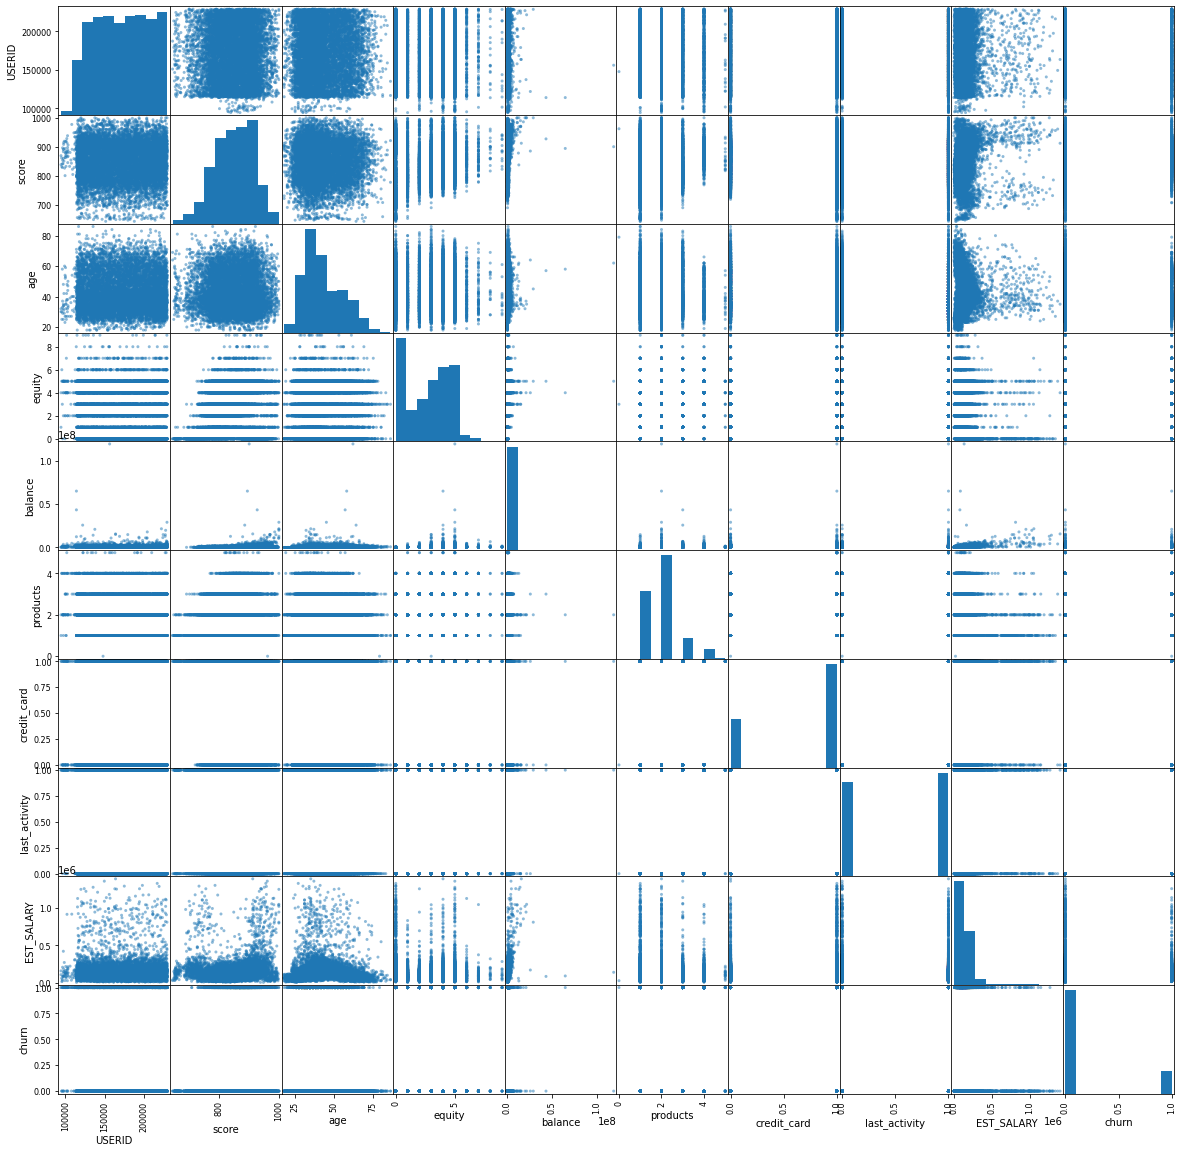

In [6]:
# Построим матрицу расеянья
pd.plotting.scatter_matrix(df, figsize=(20, 20))
plt.show()

По матрице расеянья видны отдельные выбросы к ряде колонок, а также в equity наблюдается распределение, отличное от нормального.

Выводы:
    Данных для анализа достаточно, есть проблемы в виде применения разного регистра, не правильного типа данных в графе age и пропусков данных в графах age и balance.
    По матрице расеянья видны отдельные выбросы к ряде колонок, а также в equity наблюдается распределение, отличное от нормального.
    Будем с этим разбираться.

##  Предобработка данных 

### Привести данные к нужному типу и регистру

In [7]:
# Приведем все к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [8]:
# Приведем все к нужному типу данных
df['age']=df['age'].fillna(0).astype('int')
# На пропуски в графе age поставил временно заглушку, позже решу что с ними делать

### Проверить пропуски и нулевые значения

In [9]:
# Пропуски в age
df['age'].describe()
df['age'].unique()

array([25, 37, 30, 51, 34, 56, 39, 38, 54, 67, 52, 41, 31, 28, 35, 42, 45,
       53, 40, 43, 47, 48, 61, 62, 36, 26, 27, 60, 72, 50, 46, 55, 58, 71,
       44, 49, 33, 32, 66, 29, 68, 73, 69, 59, 21, 65, 57, 63, 80, 24, 70,
       77, 64, 23, 20, 18, 19, 78, 74, 76, 22, 75,  0, 83, 82, 81, 84, 79,
       86])

In [10]:
# Посмотрим на "0"
df1 = df.loc[df['age']==0]
df1

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,0,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,0,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,0,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,0,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,0,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,0,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,0,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,0,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,0,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,0,3,188648.77,2,0,1,75206.90,0


In [11]:
#Выведем сводную таблицу с пропусками в возрасте
df.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,10000.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.623300,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.357276,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


In [12]:
#Выведем сводную таблицу с без пропусков в возрасте
df1 = df.loc[df['age']!=0]
df1.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


In [13]:
share_0_age = (df['age'][df['age'] == 0].count() / df['age'].count()) * 100
print("Доля пропусков в age:", share_0_age,"% от всех данных")

Доля пропусков в age: 0.26 % от всех данных


Процент пропуска в age очень мал и можно его удалить или поставить заглушку, а в дальнейшем фильтровать данные. Средние и медианные значения всех колонок с пропусками в возрасте и без отличаются слабо.
За удаление говорит еще и тот факт, что в пропущенных данных в age много пропусков и в balance.

In [14]:
# Удалим пропуски
df=df.loc[df['age']!=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1013.0+ KB


In [15]:
# Пропуски в balance
df['balance'].unique()

array([  59214.82,  850594.33,        nan, ...,   78144.65,  865457.97,
       1180886.7 ])

In [16]:
# Посмотрим на НАН
df1 = df.loc[df['balance'].isna()==True]
df1


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46,0,NaN,1,1,0,196898.29,0


In [17]:
#Выведем сводную таблицу с пропусками в балансе
df[df['balance'].isnull()].describe()


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.000000,2279.000000,2279.000000,2279.000000,0.0,2279.000000,2279.000000,2279.000000,2.279000e+03,2279.000000
mean,171904.885915,865.357174,42.093023,0.051338,NaN,1.163229,0.815270,0.548925,2.263454e+05,0.005704
std,33303.215270,89.553735,11.941551,0.226623,NaN,0.403713,0.388164,0.497710,1.998256e+05,0.075327
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,142992.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.202174e+05,0.000000
50%,172304.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.743479e+05,0.000000
75%,201257.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403728e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


In [18]:
#Выведем сводную таблицу без пропусков в балансе
df1 = df.loc[df['balance'].isna()==False]
df1.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,7695.000000,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000
mean,171710.892268,843.744120,42.924366,3.394802,8.272456e+05,2.081222,0.640156,0.515140,1.245204e+05,0.234698
std,33812.862444,55.342539,12.244010,1.584817,1.980327e+06,0.757446,0.479986,0.499803,1.046671e+05,0.423837
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142638.000000,801.000000,33.000000,2.000000,2.956987e+05,2.000000,0.000000,0.000000,6.755698e+04,0.000000
50%,172710.000000,840.000000,40.000000,4.000000,5.242953e+05,2.000000,1.000000,1.000000,1.062502e+05,0.000000
75%,201145.500000,882.000000,52.000000,5.000000,9.800512e+05,2.000000,1.000000,1.000000,1.551446e+05,0.000000
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Анализируя данные с пропусками в балансе и данные без пропусков в балансе, среднее значение est_salary отличается примерно в два раза (2.263454e+05	в данных с пропусками и 1.245204e+05 в данных без пропусков). Среднемедианное значение отличается в score (865 в данных с пропусками и 844 в данных без пропусков), equity (0 в данных с пропусками и 4 в данных без пропусков), products (1  в данных с пропусками и 2  в данных без пропусков). Таким образом данные с пропусками в балансе сильно отличаются от данных без пропусков, есть взаимосвязь данных. Удаление данных с пропусками сильно исказит картину.

In [19]:
share_0_age = ((df['balance'].isna().sum() / df['balance'].count()) * 100).round(2)
print("Доля пропусков в balance:", share_0_age,"% от всех данных")

Доля пропусков в balance: 29.62 % от всех данных


Удаление пропусков приводит к тому, что медианное и среднее значение в колонке score и est_salary занижается, а equity растет. 
К тому же растет и среднее значение оттока.

Процент пропусков достаточно большой, замена средним или медианным приведет к сильным искажениям данных. Предлагаю это проверить.



In [20]:
df['balance'].describe()

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

Среднее значение в столбце баланса с НАН составляет 8.272456e+05, медианое - 5.242953e+05

In [21]:
# Замена медианным
dfmedian=df.copy()
median = dfmedian['balance'].median()
dfmedian['balance']=dfmedian['balance'].fillna(median)
dfmedian['balance'].describe()
#median


count    9.974000e+03
mean     7.580232e+05
std      1.744048e+06
min      0.000000e+00
25%      3.569955e+05
50%      5.242953e+05
75%      8.042563e+05
max      1.191136e+08
Name: balance, dtype: float64

Среднее значение в столбце баланса с заменой медианным значением составляет 7.580232e+05, медианое - 5.242953e+05

In [22]:
# Замена средним
dfmean=df.copy()
mean = dfmean['balance'].mean()
dfmean['balance']=dfmean['balance'].fillna(mean)
dfmean['balance'].describe()
#mean

count    9.974000e+03
mean     8.272456e+05
std      1.739403e+06
min      0.000000e+00
25%      3.569955e+05
50%      7.480884e+05
75%      8.272456e+05
max      1.191136e+08
Name: balance, dtype: float64

Среднее значение в столбце баланса с заменой средним значением составляет 8.272456e+05, медианое - 7.480884e+05

Как видим замена средним и медианным значением сильно искажает значение в столбце баланса.

Если говорить о природе пропусков, то она не ясна, это могут быть и нулевые значенияб ошибки при заполнении таблицы, ошибки при выгрузки таблицы. Аможет кто-то решил скрыть свои доходы))
Учитывая всё вышесказанное, а также большой объем пропущенных данных, то целесообразно поставить заглушку, а в процессе работы с данными по балансу делать фильтрацию.


In [23]:
df['balance']=df['balance'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        9974 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1013.0+ KB


Выводы:

Пропусков не очень много во всем датафрейме. В графе "возраст" их менее 1%, их можно просто удалить, а вот в графе "баланс" их доля стремится к 30%, что достаточно много удалять или заменять "искусственными" значениями не корректно, поставил заглушку.

### Проверка аномальных значений

In [24]:
display(df.describe())

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.000000,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,6.382246e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374
std,33695.527126,65.399720,12.179971,1.979965,1.773745e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172
min,94561.000000,642.000000,18.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,6.280320e+04,1.000000,0.000000,0.000000,7.525166e+04,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,3.762536e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,8.042563e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


на что можно обратить внимание: 

минимальное значение у equity - 0 может кто-то и не имеет ничего в собственности или шифруется

минимальное значение у products - 0 такое может такое и возможно, если это не активный клиент, но скорее всего это аномалия

In [25]:
# отфильтруем нулевые значения в продуктах
df=df[df['products'] > 0]

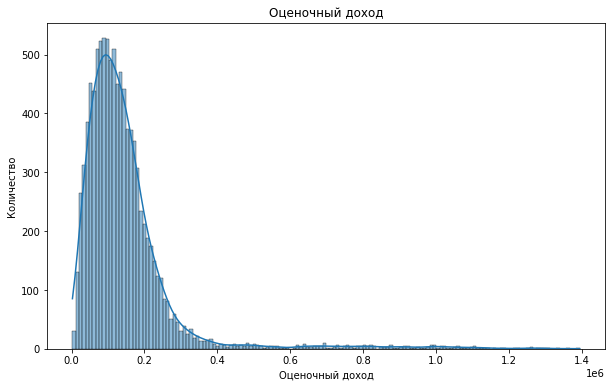

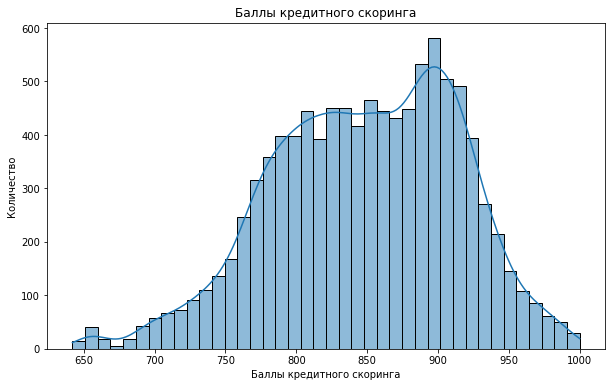

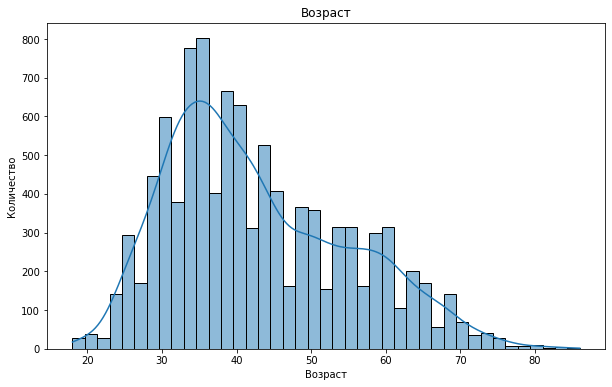

In [26]:
#выделим не категорийные значения


columns = ['est_salary', 'score', 'age']
column_name = {'est_salary': 'Оценочный доход', 'score': 'Баллы кредитного скоринга', 'age': 'Возраст'}

warnings.filterwarnings("ignore")
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.title(column_name[column])
    sns.histplot(data=df, x=column, kde=True)  
    plt.xlabel(column_name[column])  
    plt.ylabel('Количество')
    plt.show()

Наблюдаются отклонения от нормальности у score и age. У est_salary наблюдается "ус" справа. Вцелом аномалий невыявлено.

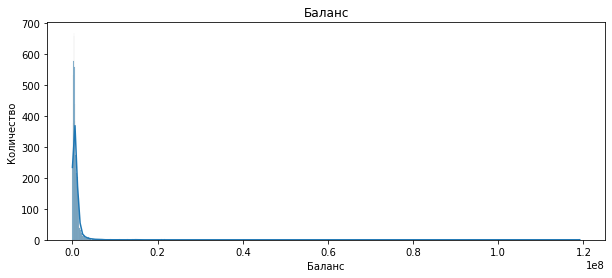

In [27]:
# Рассмотрим поближе распределение 'balance', отфильтруем заглушку
df3=df.copy()
df3=df3[df3['balance']>=0]


plt.figure(figsize=(10,4)) 
plt.title('Баланс')
sns.histplot(data=df3, x=df3['balance'],  kde=True) 
plt.ylabel('Количество') 
plt.xlabel('Баланс')
plt.show()


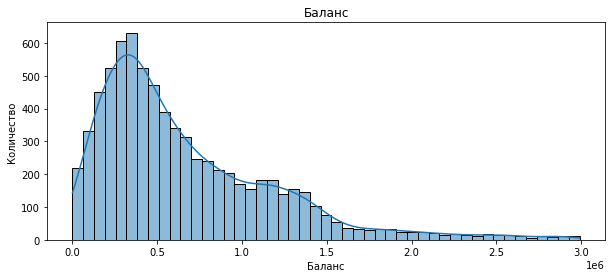

In [28]:
df3=df.copy()
df3=df[(df['balance']<3000000)&(df['balance']>=0)]
plt.figure(figsize=(10,4)) 
plt.title('Баланс')
sns.histplot(data=df3, x=df3['balance'],  kde=True)  
plt.ylabel('Количество') 
plt.xlabel('Баланс')
plt.show()


У баланса наблюдается "ус" справа. Наблюдается аномальнобольшое количество значений в районе 0. Это влияние заглушки, пока ее оставим, посмотрим что будет по дубликатам.

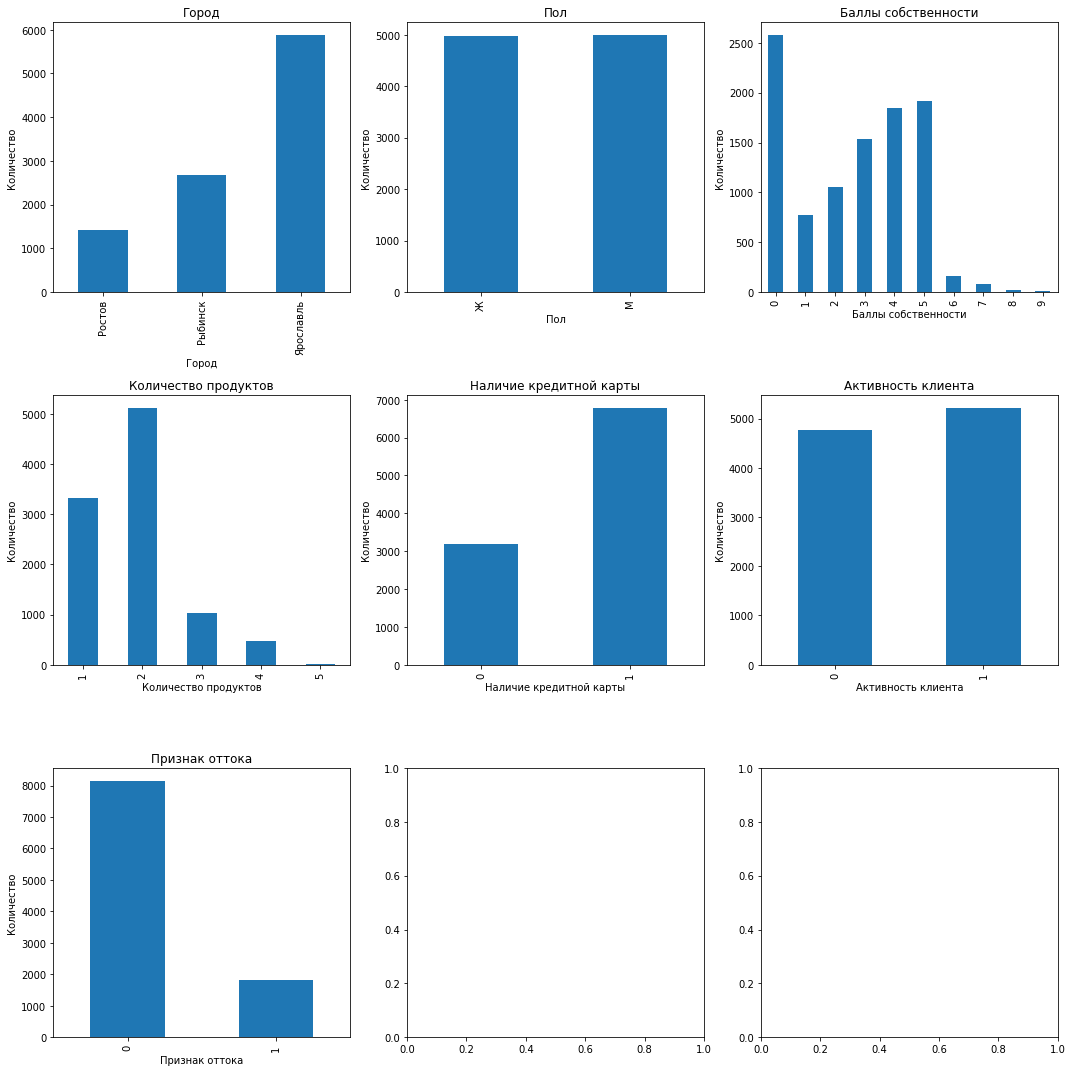

In [29]:
columns = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn']
column_name = {'city': 'Город', 'gender': 'Пол', 'equity': 'Баллы собственности', 'products': 'Количество продуктов',
               'credit_card': 'Наличие кредитной карты', 'last_activity': 'Активность клиента',
               'churn': 'Признак оттока'}

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, column in enumerate(columns):
    data = df[column].value_counts().sort_index()
    ax = axes[i//3, i%3]
    data.plot(kind='bar', ax=ax)
    ax.set_title(column_name[column])
    ax.set_xlabel(column_name[column])
    ax.set_ylabel('Количество') 

plt.tight_layout()
plt.show()



По городам в топе Ярославль. По полу выборка распределена примерно поровну.

По баллам собственности, а вот тут интересно почему так много нулей??? Удалять их нельзя - сильно исказим данные, плюс может кто-то не имеет или имеет в собственности очень малое количество имущества и его рейтинг 0

По количеству продуктов большинство имеет не более двух продуктов.

Клиентов с кредитной картой в два раза больше чем без. 

Активных и неактивных клиентов примерно поровну

Наблюдаем большой общий отток клиентов, с этим надо и разобраться.

### Проверка дубликатов

In [30]:
#Проверять дубликаты  в нашем датафрейме имеет смысл только по столбцу userid, balance, est_salary
# Проверим явные дубликаты
print(df.shape[0])
print(df.duplicated(subset=['userid', 'balance', 'est_salary']).sum())

9973
0


Явных дубликатов не выявлено

In [31]:
# Дубли в 'userid'
print(df.shape[0])
print(df.duplicated(subset=['userid']).sum())

duplicat=df[df.duplicated(subset=['userid'], keep=False)]

grouped_duplicates = duplicat.groupby('userid')
for key, group in grouped_duplicates:
    display(group)


9973
50


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38,0,-1.00,1,0,1,119247.61,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4866,117943,855.0,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40,0,-1.00,1,1,0,137718.93,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5863,120258,908.0,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.0,Ярославль,М,30,0,-1.00,1,1,1,146427.96,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1411,123461,829.0,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34,0,-1.00,2,1,0,291619.27,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8164,124450,859.0,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4850,126368,909.0,Ярославль,Ж,30,4,1322623.29,2,0,1,140675.66,1
5420,126368,832.0,Рыбинск,Ж,33,0,-1.00,1,0,0,118465.34,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3988,129785,904.0,Рыбинск,М,33,5,2427737.6,3,0,1,188856.75,1
9504,129785,949.0,Ярославль,М,43,0,-1.0,1,1,1,166845.37,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
904,131419,934.0,Ярославль,М,35,5,2348335.95,2,0,0,217105.13,1
2138,131419,739.0,Рыбинск,Ж,37,3,1307941.65,3,0,0,103867.47,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1608,140377,802.0,Ярославль,М,26,3,539863.29,4,1,1,112167.83,1
7487,140377,930.0,Рыбинск,Ж,34,5,1123967.02,1,1,1,148336.26,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2276,141265,858.0,Ярославль,М,37,4,471599.16,2,1,1,148806.88,1
5569,141265,811.0,Рыбинск,Ж,33,3,1044316.88,2,1,0,46055.32,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5369,143592,885.0,Рыбинск,Ж,56,4,1201087.46,2,1,1,88223.89,1
5557,143592,764.0,Ярославль,Ж,68,3,508919.15,2,0,1,71211.66,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5252,148826,895.0,Ярославль,М,32,5,1470273.14,2,0,0,118058.52,1
8364,148826,909.0,Рыбинск,Ж,32,0,-1.00,3,1,0,28843.54,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
946,149365,877.0,Ярославль,М,41,5,819182.01,2,0,0,212316.47,1
8272,149365,793.0,Рыбинск,Ж,61,0,476496.99,2,1,1,46147.06,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2439,150667,813.0,Рыбинск,Ж,44,0,62504.47,4,1,0,152393.79,1
9267,150667,931.0,Ярославль,М,41,0,-1.00,1,0,0,261904.44,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
690,152479,768.0,Рыбинск,Ж,42,0,126787.79,4,1,1,143233.23,1
5705,152479,723.0,Ярославль,Ж,22,0,-1.00,1,1,0,83955.65,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3274,155765,863.0,Ярославль,М,30,5,1036114.5,5,1,1,150744.5,1
5197,155765,923.0,Рыбинск,М,30,0,-1.0,1,1,1,120296.6,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1080,155872,896.0,Ярославль,М,36,3,1113656.92,3,0,1,291176.85,1
9363,155872,714.0,Рыбинск,Ж,29,0,-1.00,1,1,0,118052.84,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3936,160075,899.0,Ярославль,М,34,4,1647814.67,4,1,0,151888.42,1
9508,160075,824.0,Рыбинск,Ж,57,3,355047.33,2,0,0,64351.81,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5629,162053,921.0,Рыбинск,М,33,3,857011.13,2,1,1,113512.57,1
8733,162053,786.0,Ярославль,М,29,4,205824.97,3,1,0,121371.73,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3564,163207,853.0,Рыбинск,М,42,4,543839.62,1,1,1,105281.97,1
6786,163207,838.0,Ярославль,Ж,42,4,652776.60,2,1,1,97545.36,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
58,164676,860.0,Ярославль,М,37,5,648594.03,2,1,1,213586.86,1
7271,164676,790.0,Рыбинск,Ж,77,1,111202.01,1,1,0,32835.45,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5020,168998,886.0,Ярославль,Ж,35,4,394780.61,2,1,1,510577.10,1
9785,168998,895.0,Рыбинск,М,44,0,282653.53,3,0,0,255296.47,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
790,170312,901.0,Ярославль,М,33,4,3276783.93,3,0,1,358700.96,1
3039,170312,813.0,Рыбинск,Ж,47,3,370027.67,2,0,0,129835.56,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4587,171751,874.0,Рыбинск,Ж,26,5,292054.42,2,0,1,20528.56,1
9653,171751,862.0,Ярославль,М,42,4,481992.19,2,1,0,71816.86,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2941,172142,896.0,Ярославль,Ж,30,4,1009073.14,4,1,0,70866.29,1
6756,172142,751.0,Рыбинск,Ж,69,3,396568.03,2,0,1,45608.45,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7753,175730,846.0,Ярославль,Ж,32,7,216764.74,4,1,1,77100.85,1
9970,175730,816.0,Рыбинск,М,36,4,477892.07,3,1,0,81100.60,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2989,181526,918.0,Ярославль,Ж,37,5,1366382.35,4,1,1,97932.95,1
8705,181526,895.0,Рыбинск,М,29,0,-1.00,1,1,1,124786.53,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8584,183510,922.0,Ярославль,М,26,5,448542.42,3,0,1,66063.13,1
9146,183510,800.0,Рыбинск,Ж,42,7,473293.81,2,1,0,54049.88,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
150,185748,850.0,Рыбинск,М,36,5,1203376.67,2,0,1,89401.82,1
3106,185748,912.0,Ярославль,Ж,47,5,1598218.98,2,0,0,180256.98,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5454,188957,853.0,Ярославль,М,35,1,374959.62,2,1,1,197600.97,1
6005,188957,882.0,Рыбинск,Ж,64,3,893392.91,3,1,0,69622.58,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
231,190253,823.0,Рыбинск,М,37,4,373348.39,2,0,1,131947.92,1
1583,190253,726.0,Ярославль,М,49,0,-1.00,1,1,1,177700.78,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3859,191520,773.0,Рыбинск,М,36,3,1219918.08,4,1,1,119933.13,1
7931,191520,767.0,Ярославль,М,45,0,-1.00,1,1,1,880005.05,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2226,195884,906.0,Ярославль,М,49,6,1354552.83,2,0,0,270678.42,1
9659,195884,767.0,Рыбинск,Ж,45,1,335652.56,3,1,1,100197.67,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
161,197364,928.0,Рыбинск,Ж,53,6,1347183.86,2,0,1,168189.49,1
4870,197364,889.0,Ярославль,М,33,0,-1.00,2,1,1,96173.48,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2499,199312,948.0,Ярославль,М,41,5,3095721.85,4,1,1,307234.69,1
8822,199312,911.0,Рыбинск,Ж,43,0,-1.00,2,1,1,152189.72,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9035,200863,933.0,Рыбинск,М,29,7,766924.56,2,0,1,89323.33,1
9175,200863,832.0,Ярославль,М,42,5,620064.73,2,0,0,188054.46,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1513,208081,873.0,Ярославль,М,31,2,232814.75,2,1,1,122505.86,1
2998,208081,821.0,Рыбинск,Ж,62,3,493608.26,2,1,1,33491.45,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1580,208738,897.0,Рыбинск,Ж,45,5,859018.19,2,1,1,145510.08,1
5840,208738,839.0,Ярославль,М,60,5,1102438.37,2,0,1,116500.81,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3350,208815,877.0,Рыбинск,М,25,4,239421.18,1,1,1,48638.00,1
5570,208815,773.0,Ярославль,М,39,4,288110.09,2,1,0,56971.91,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7453,210627,864.0,Ярославль,Ж,38,4,1527225.32,4,1,1,162999.17,1
8521,210627,804.0,Рыбинск,М,30,2,347818.88,3,1,0,129015.25,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
869,210662,962.0,Ярославль,Ж,54,5,5069231.39,1,1,1,955144.85,1
1837,210662,896.0,Рыбинск,Ж,37,0,-1.00,2,0,0,90916.04,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4986,210792,884.0,Рыбинск,М,48,4,2228037.20,2,0,1,207978.09,1
7814,210792,839.0,Ярославль,М,42,2,662646.97,1,1,0,138403.60,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1359,211130,833.0,Ярославль,М,55,3,1231184.9,4,0,1,187758.38,1
3817,211130,918.0,Рыбинск,Ж,55,0,-1.0,2,1,1,244202.04,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7055,217412,879.0,Рыбинск,М,42,5,568140.15,3,0,0,231658.67,1
9880,217412,886.0,Ярославль,Ж,35,3,1026172.14,2,1,0,53099.16,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4611,217619,903.0,Рыбинск,Ж,59,5,844055.83,2,0,1,133999.76,1
5807,217619,766.0,Ярославль,М,52,2,218199.47,1,1,0,120356.44,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1970,217643,845.0,Ярославль,М,29,5,733098.45,4,1,1,41443.01,1
4186,217643,804.0,Рыбинск,Ж,40,2,301836.65,2,1,1,81137.22,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4623,217826,842.0,Ярославль,М,39,4,439747.65,2,0,1,116736.75,1
9406,217826,790.0,Рыбинск,Ж,46,4,430414.80,2,1,1,49400.37,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1740,220816,840.0,Ярославль,Ж,41,3,1193287.13,2,1,1,76434.94,1
2302,220816,934.0,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2597,226719,990.0,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1
4216,226719,903.0,Рыбинск,Ж,63,0,-1.00,1,1,0,138582.58,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8205,227795,840.0,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34,2,326593.14,2,1,0,103314.92,0


Да есть дубликаты, но если посмореть на эти дубликаты в привязке к остальным данным, то видно что это разные клиенты, проживающие в разных городах, разного возраста, имееют разные баллы, баланс и доход, ну и разный признак оттока
Удалять таких клиентов нельзя.

In [32]:
# Дубли в 'balance'
print(df.shape[0])
print(df.duplicated(subset=['balance']).sum())

duplicat=df[df.duplicated(subset=['balance'], keep=False)]

grouped_duplicates = duplicat.groupby('balance')
for key, group in grouped_duplicates:
    display(group)

9973
2281


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30,0,-1.0,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67,0,-1.0,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52,0,-1.0,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41,0,-1.0,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53,0,-1.0,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38,0,-1.0,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42,0,-1.0,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36,0,-1.0,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46,0,-1.0,1,1,0,196898.29,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20,2,0.0,2,1,0,23876.51,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2848,148468,721.0,Ростов,М,36,2,26.0,2,1,1,102856.89,0
8901,129221,712.0,Ярославль,Ж,39,2,26.0,2,1,0,46937.73,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5199,172464,746.0,Рыбинск,М,33,3,38.0,2,1,0,73051.30,0
6730,209790,729.0,Ярославль,Ж,27,3,38.0,2,1,1,18816.75,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
566,216691,733.0,Ярославль,Ж,58,0,39.0,1,1,1,25780.53,0
7198,197688,729.0,Ярославль,Ж,30,4,39.0,2,0,0,30269.47,0


In [33]:
# Дубли в 'est_salary'
print(df.shape[0])
print(df.duplicated(subset=['est_salary']).sum())

duplicat=df[df.duplicated(subset=['est_salary'], keep=False)]

grouped_duplicates = duplicat.groupby('est_salary')
for key, group in grouped_duplicates:
    display(group)

9973
3


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
513,120675,832.0,Рыбинск,Ж,37,2,430220.82,2,1,1,49742.87,0
2442,152240,861.0,Ростов,Ж,60,3,599546.80,2,0,1,49742.87,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4642,133759,831.0,Ярославль,М,50,5,560145.71,2,1,1,108250.17,0
6050,202056,979.0,Рыбинск,Ж,30,2,820572.71,3,1,0,108250.17,0


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
884,214629,772.0,Ярославль,М,53,2,335295.37,2,1,1,176348.18,0
8376,217828,947.0,Ярославль,М,30,5,393215.11,1,1,0,176348.18,0


По балансу и оценочному доходу тоже есть дубликаты. Опять же нельзя сказать что клиенты с одним и тем же балансом это один человек, т.к. есть существенные различия в остальных колонках.
Где-то город отличается, где-то пол, а где-то возраст. Возможно тут есть ошибки при заполнении базы (вбито какое-то число, например предыдущего клиента банка).


Выводы:

    Дубликатов в колонках очень много, удалять их нельзя т.к. исказим данные.
    
    Если смотреть дубликаты в отдельных столбцах в привязке к другим данным, то видно, что данные сильно различаются. 
    Где-то город отличается, где-то пол, а где-то возраст.
    
    Если говорить про колонку userid. то можно предположить, что в каждом городе свое присвоение ID пользователя и возможно, что пользователь с таким же ID есть и в другом городе. А также есть такая вероятность, что один пользователь уходит и его ID присваивается другому.
    
   В общем и целом природа дубликатов связанна с процессами в работе банка. Нужно делать упор на точность заполнения данных.

In [34]:
print(df[df['balance']>=0].describe())

              userid        score          age       equity       balance  \
count    7695.000000  7695.000000  7695.000000  7695.000000  7.695000e+03   
mean   171710.892268   843.744120    42.924366     3.394802  8.272456e+05   
std     33812.862444    55.342539    12.244010     1.584817  1.980327e+06   
min     94561.000000   689.000000    18.000000     0.000000  0.000000e+00   
25%    142638.000000   801.000000    33.000000     2.000000  2.956987e+05   
50%    172710.000000   840.000000    40.000000     4.000000  5.242953e+05   
75%    201145.500000   882.000000    52.000000     5.000000  9.800512e+05   
max    229136.000000  1000.000000    86.000000     9.000000  1.191136e+08   

          products  credit_card  last_activity    est_salary        churn  
count  7695.000000  7695.000000    7695.000000  7.695000e+03  7695.000000  
mean      2.081222     0.640156       0.515140  1.245204e+05     0.234698  
std       0.757446     0.479986       0.499803  1.046671e+05     0.423837  
mi

In [35]:
#сделаем кодирование переменых
dummies = pd.get_dummies(df[['city', 'gender']])
df = pd.concat([df, dummies], axis=1)
df

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30,0,-1.00,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,0,1,0,0,1
9996,139170,894.0,Ярославль,М,46,0,-1.00,1,1,0,196898.29,0,0,0,1,0,1
9997,115639,903.0,Ярославль,М,24,0,-1.00,2,1,1,108905.09,0,0,0,1,0,1
9998,148700,777.0,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,0,0,1,1,0


Выводы по разделу:
    
    1. Пропусков не очень много во всем датафрейме. В графе "возраст" их менее 1%, их можно просто удалить, а вот в графе "баланс" их доля стремится к 30%, что достаточно много удалять или заменять "искусственными" значениями не корректно, поставил заглушку.
    
    2. Дубликатов в колонках очень много, удалять их нельзя т.к. исказим данные. Если смотреть дубликаты в отдельных столбцах в привязке к другим данным, то видно, что данные сильно различаются. Где-то город отличается, где-то пол, а где-то возраст. Если говорить про колонку userid. то можно предположить, что в каждом городе свое присвоение ID пользователя и возможно, что пользователь с таким же ID есть и в другом городе. А также есть такая вероятность, что один пользователь уходит и его ID присваивается другому. 
    
    3. Если смотреть на распределения, то наблюдается отклонение от нормальности у score и age. У est_salary наблюдается "ус" справа. Вцелом аномалий невыявлено. По городам в топе Ярославль. По полу выборка распределена примерно поровну. В equity, а вот тут интересно почему так много нулей??? Удалять их нельзя - сильно исказим данные, плюс может кто-то не имеет или имеет в собственности очень малое количество имущества и его рейтинг 0. По количеству продуктов большинство имеет не более двух продуктов. Клиентов с кредитной картой в два раза больше чем без. Активных и неактивных клиентов примерно поровну. Наблюдаем большой общий отток клиентов, с этим надо и разобраться.
    

In [36]:
df = df.drop(columns=['userid'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   score           9973 non-null   float64
 1   city            9973 non-null   object 
 2   gender          9973 non-null   object 
 3   age             9973 non-null   int64  
 4   equity          9973 non-null   int64  
 5   balance         9973 non-null   float64
 6   products        9973 non-null   int64  
 7   credit_card     9973 non-null   int64  
 8   last_activity   9973 non-null   int64  
 9   est_salary      9973 non-null   float64
 10  churn           9973 non-null   int64  
 11  city_Ростов     9973 non-null   uint8  
 12  city_Рыбинск    9973 non-null   uint8  
 13  city_Ярославль  9973 non-null   uint8  
 14  gender_Ж        9973 non-null   uint8  
 15  gender_М        9973 non-null   uint8  
dtypes: float64(3), int64(6), object(2), uint8(5)
memory usage: 983.7+ KB


## Исследовательский анализ данных

In [38]:
total_churned = df[df['churn'] == 1]['churn'].count()
total_not_churned = df['churn'].count()
ratio = (total_churned / total_not_churned)*100
print(f'Доля оттока: {ratio:.2f}%')


Доля оттока: 18.23%


 ### Растределение непрерывных величин

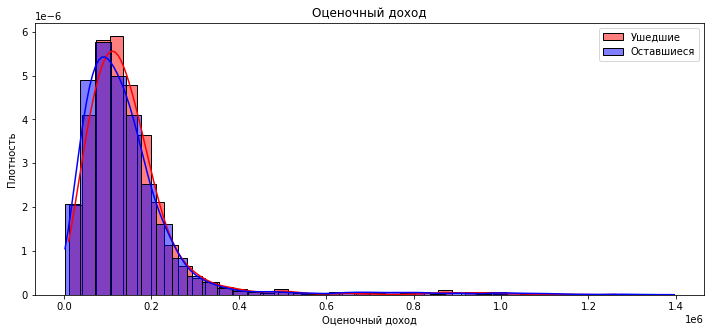

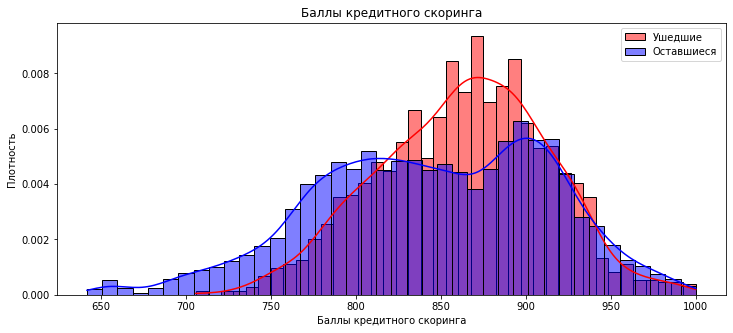

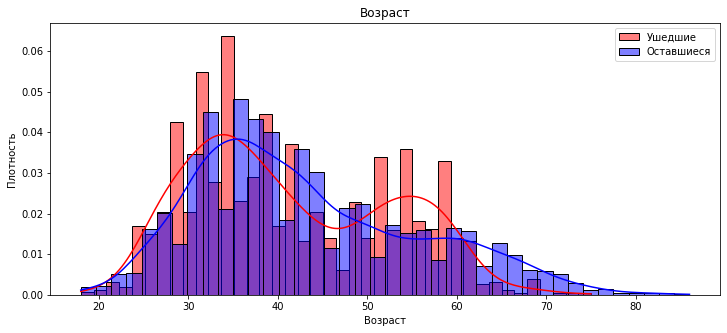

In [39]:
#выделим не категорийные значения и построим распределения в разрезе оттока клиентов
columns = [
    'est_salary', 'score', 'age'
           ]
column_name = {'est_salary': 'Оценочный доход', 'score': 'Баллы кредитного скоринга', 'age': 'Возраст'}


warnings.filterwarnings("ignore")
for column in columns: 
    plt.figure(figsize=(12,5)) 
    plt.title(column)
    sns.histplot(data=df[df['churn']==1][column], label='Ушедшие', kde=True, color='red', 
                 stat="density", common_norm=False, bins=40)
    sns.histplot(data=df[df['churn']==0][column], label='Оставшиеся', kde=True, color='blue', 
                 stat="density", common_norm=False, bins=40)
    plt.ylabel('Плотность')
    plt.xlabel(column_name[column])
    plt.title(column_name[column])
    plt.legend()
    plt.show()


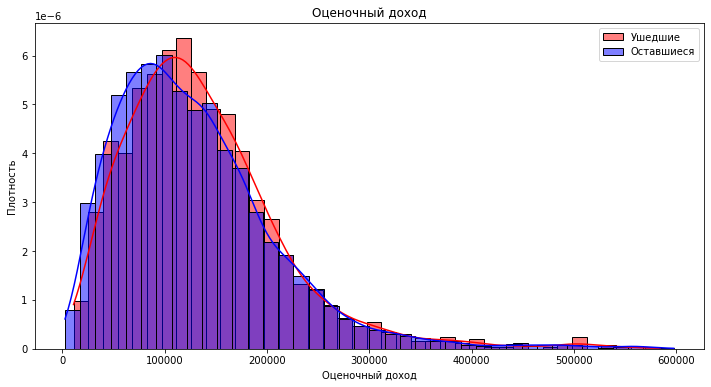

In [40]:
# Рассмотрим поближе распределение оценочный доход
df5=df.copy()
df5 = df[(0 < df['est_salary']) & (df['est_salary'] < 600000)]
plt.figure(figsize=(12,6)) 
plt.title('Оценочный доход')
sns.histplot(data=df5[df5['churn']==1]['est_salary'], label='Ушедшие', kde=True, color='red', stat="density", common_norm=False, bins=40)
sns.histplot(data=df5[df5['churn']==0]['est_salary'], label='Оставшиеся', kde=True, color='blue', stat="density", common_norm=False, bins=40)
plt.ylabel('Плотность')
plt.xlabel('Оценочный доход')
plt.title('Оценочный доход')
plt.legend()
plt.show()

Вид распределений у параметра оценочного дохода как у оставшихся, так и у ушедших нормальный. Аналогично у ушедших клиентов в score. В остальных случаях (age и оставшиеся клиенты в score) имеются отклонения от номальности. 

По оценочному доходу можно выделить участок от 100000 у.е. до 210000 у.е., когда плотность плотность ушедших высока.
Имеется высокая плотность ушедших в score в диапазоне от 850 до 900.
По возрасту имеется два участка от 25 до 30 лет и от 51 до 59 лет, когда плотность плотность ушедших высока.



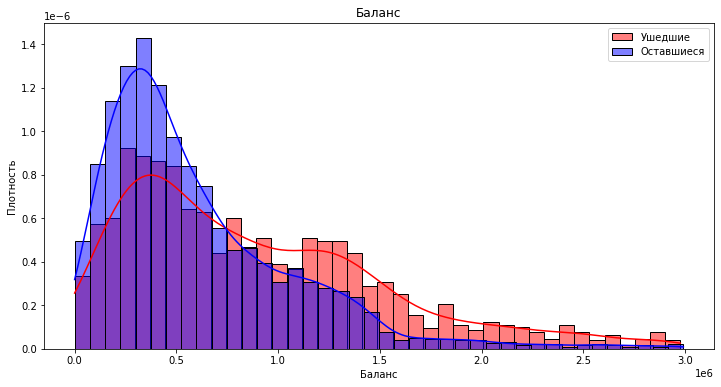

In [41]:
# Рассмотрим поближе распределение 'balance', отфильтруем заглушку и нулевые значения
df1=df.copy()
df1 = df[(0 < df['balance']) & (df['balance'] < 3000000)]
plt.figure(figsize=(12,6)) 
plt.title('balance')
sns.histplot(data=df1[df1['churn']==1]['balance'], label='Ушедшие', kde=True, color='red', stat="density", common_norm=False, bins=40)
sns.histplot(data=df1[df1['churn']==0]['balance'], label='Оставшиеся', kde=True, color='blue', stat="density", common_norm=False, bins=40)
plt.ylabel('Плотность')
plt.xlabel('Баланс')
plt.title('Баланс')
plt.legend()
plt.show()



А вот тут интересно, вплость до баланса в 1 млн у.е. отток клиентов был высоким, но меньше чем количество оставшихся. Начиная с баланса в 1 млн у.е. отток превалирует.

Вывод по подразделу:

    Исходя из анализа распределений непрерывных величин, стоит обратить внимание на клиентов с балансом больше 1 млн. 
    А также на клиентов с баллом кредитного скоринга от 850 до 900.
    
    По оценочному доходу можно выделить участок от 100000 у.е. до 210000 у.е., когда плотность плотность ушедших высока.
    
    По возрасту имеется два участка от 25 до 30 лет и от 51 до 59 лет, когда плотность плотность ушедших высока.
    
    Начиная с баланса в 1 млн у.е. отток превалирует.

### Портрет пользователя

In [42]:
#Посчитаем средние и медианные значения по критерию оттока
dfb = df[(df['balance'] > 0)]

In [43]:
df.groupby('churn')['score', 'age', 'est_salary'].mean()

,score,age,est_salary
churn,,,
0,845.396199,43.020846,147674.637881
1,863.361936,41.429593,148357.483157


In [44]:
dfb.groupby('churn')[ 'balance'].mean()

churn
0    7.332807e+05
1    1.134458e+06
Name: balance, dtype: float64

In [45]:
df.groupby('churn')['equity', 'products', 'credit_card', 'last_activity', 'gender_М', 'gender_Ж'].median()

,equity,products,credit_card,last_activity,gender_М,gender_Ж
churn,,,,,,
0,3,2,1,0,0,1
1,4,2,1,1,1,0


Средний возраст отточных клиентов 41-42 года. Средний возраст неотточных клиентов 43-44 года

Средний score отточных клиентов 863-864.

Средний баланс отточный клиентов составляет 1134458 у.е.

Средний оценочный доход отточных и не отточных сильно не отличается.

По категорийным значениям есть отличия у отточных в:

колличестве баллов собственности 4 против не отточных, у которых 3,

активности 1 против не отточных, у которых 0,

поле у отточных преобладают мужчины, у не отточных женщины.

churn      оставшиеся    ушедшие
city                            
Ростов      81.285311  18.714689
Рыбинск     83.743475  16.256525
Ярославль   80.987234  19.012766
churn   оставшиеся    ушедшие
gender                       
Ж        87.254115  12.745885
М        76.297335  23.702665
churn   оставшиеся    ушедшие
equity                       
0        96.506211   3.493789
1        87.968952  12.031048
2        84.205519  15.794481
3        79.155844  20.844156
4        74.878181  25.121819
5        69.921671  30.078329
6        63.975155  36.024845
7        53.750000  46.250000
8        64.705882  35.294118
9        46.153846  53.846154
churn     оставшиеся    ушедшие
products                       
1          92.928077   7.071923
2          80.894706  19.105294
3          71.387283  28.612717
4          36.708861  63.291139
5          57.894737  42.105263
churn        оставшиеся    ушедшие
credit_card                       
0             74.443399  25.556601
1             85.215212  1

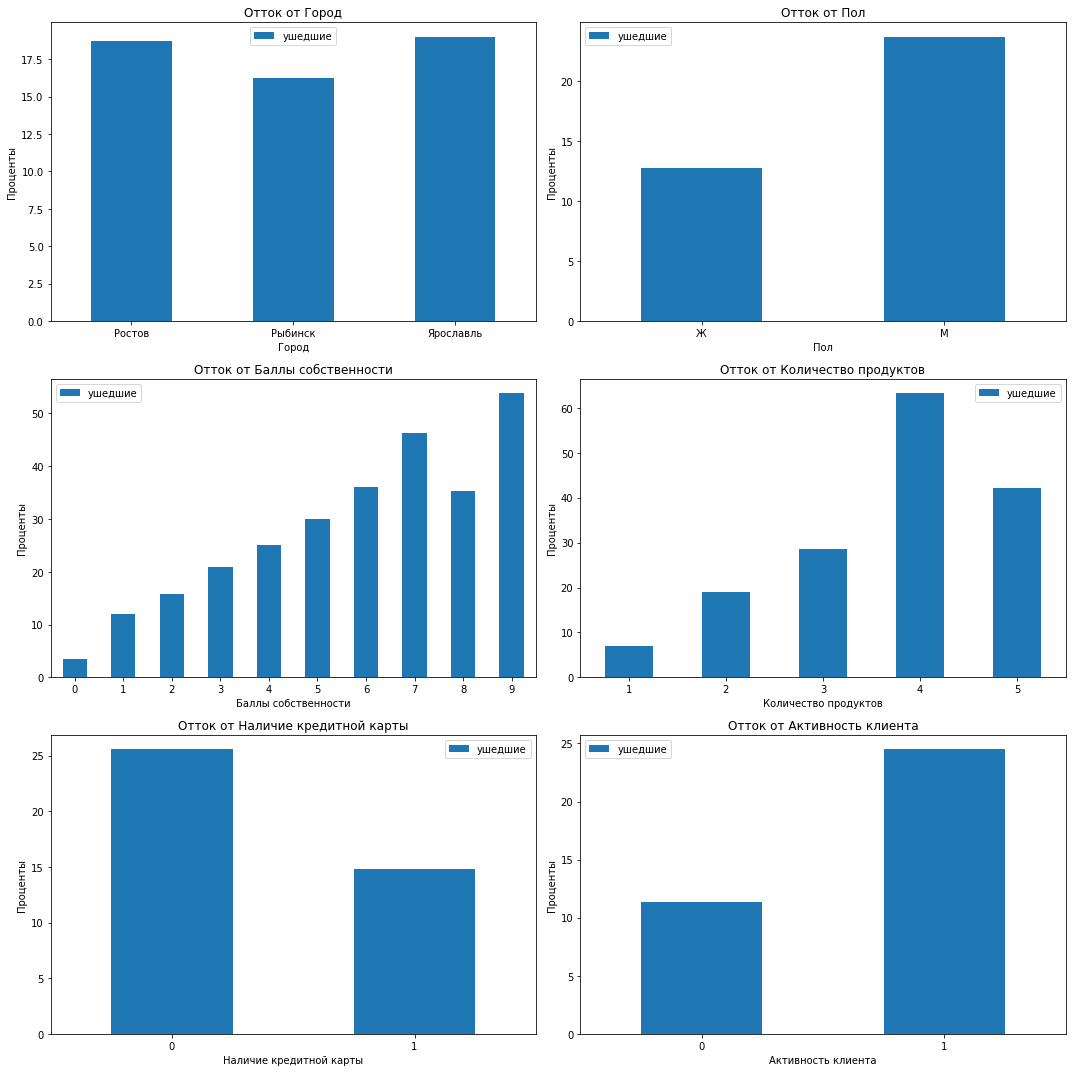

In [46]:
# посмотрим как дальше распределяются клиенты по признаку оттока, посчитаем долю оттока в % и визуализируем ее
df1=df.copy()
df1['churn'] = df1['churn'].replace({0: 'оставшиеся', 1: 'ушедшие'})

categorical_column_list = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']
column_name = {'city': 'Город', 'gender': 'Пол', 'equity': 'Баллы собственности', 'products': 'Количество продуктов',
               'credit_card': 'Наличие кредитной карты', 'last_activity': 'Активность клиента'
               }

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, column in enumerate(categorical_column_list):
    row = i // 2
    col = i % 2
    ax_curr = axes[row, col]

    churn_categorical_count = df1.groupby([column, 'churn']).size().unstack()
    churn_categorical_count = churn_categorical_count.div(churn_categorical_count.sum(axis=1), axis=0) * 100  

    churn_categorical_count.plot( y=["ушедшие"], kind='bar', stacked=True, ax=ax_curr)   
    ax_curr.set_title(f'Отток от {column_name[column]}')
    ax_curr.set_xlabel(column_name[column])
    ax_curr.set_xticklabels(churn_categorical_count.index, rotation=0)
    ax_curr.set_ylabel('Проценты')
    ax_curr.legend([ "ушедшие"])


    
    print(churn_categorical_count)
plt.tight_layout()
plt.show()

Признаком отточных клиентов является превышение среднего оттока (18,24%) по банку.

По городам (Ярославль, Ростов, Рыбинск) процент оставшихся клиентов одинаков и находится в пределах 15-20%.

В разбивки по полу тоже ничего интересного не видно, женщин ушло 13%, мужчин - 24%.

А вот с увеличением количества или стоимости собственноти процент оттока растет с 3% до 54%, что уже превышает в два раза средний отток по банку в 18,24%.

С количеством продуктов банка еще интереснее.  Процент оттока растет с ростом количества продуктов и достигает максимум в 63% с количеством продуктов банка 4. На 5 продуктах картина выравнивается и процент оттока уменьшается до 42%. Если сравнивать со средним оттоком по банку, то даже у клиентов с количеством продуктов 5 отток превышает в два  раза средние показатели по банку.

По наличию кредитных карт и последней активности можно выделить клиентов без кредитной карты и активных (отток колеблется от 11% до 24%)

Исходя из вышесказанного , можно подъитожить:

1. по городам выделить отточные категории не удается (все города находятся на границе среднего оттока по банку)

2. по полу под категорию отточных попадают мужчины (24% отточных)

3. по баллам собственности под категорию отточных попадают клиенты с баллами от 3 до 9 (балл 3 - 21% отточных, балл 9 - 54% отточных)

4. по количеству продуктов под категорию отточных попадают клиенты с количеством продуктов от 3  до 5 (клиенты с количеством продуктов 2 находятся на границе среднего оттока по банку)

5. по наличию кредитной карты под категорию отточных попадают клиенты без кредитной карты (26% отточных)

6. по активности под категорию отточных попадают автивные клиенты (25% отточных)

#### Анализ данных по нескольким признакам

In [47]:
#Проведем рассмотрение клиентов по нескольким признакам
#Посмотрим как распределяются отточные клиенты в зависимости от пола и количества продуктов
churn_categorical_count = df.groupby(['gender', 'products', 'churn']).size().unstack()
print(churn_categorical_count)

churn               0    1
gender products           
Ж      1         1463   64
       2         2334  342
       3          465  126
       4           79  100
       5            6    3
М      1         1625  171
       2         1807  636
       3          276  171
       4           95  200
       5            5    5


In [48]:
def plot_churn_by_products(df, gender):
   
    df2 = df[df['gender'] == gender]
    df2 = df2.drop(['gender'], axis=1)
    df2['churn'] = df2['churn'].replace({0: 'оставшиеся', 1: 'ушедшие'})
    churn_categorical_count = df2.groupby(['products', 'churn']).size().unstack()
    churn_categorical_count = churn_categorical_count.div(churn_categorical_count.sum(axis=1), axis=0) * 100

    ax_curr = churn_categorical_count.plot(kind='bar', y=["ушедшие"], stacked=True)
    ax_curr.set_title(f'Процент оттока от количества продуктов для {gender}')
    ax_curr.set_xlabel('Количество продуктов')
    ax_curr.set_xticklabels(churn_categorical_count.index, rotation=0)
    ax_curr.set_ylabel('Проценты')

    print(churn_categorical_count)
    plt.tight_layout()
    plt.show()

churn     оставшиеся    ушедшие
products                       
1          90.478842   9.521158
2          73.966435  26.033565
3          61.744966  38.255034
4          32.203390  67.796610
5          50.000000  50.000000


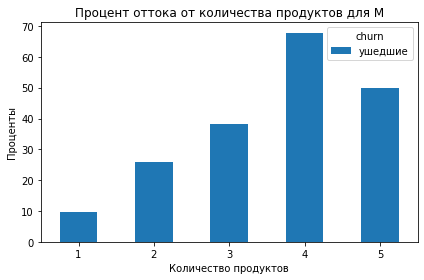

In [49]:
plot_churn_by_products(df, 'М')

В разбивке по количеству продуктов среди мужчин в топе по оттоку клиенты с количеством продукта 4 (68%) и 5 (50%)

churn     оставшиеся    ушедшие
products                       
1          95.808775   4.191225
2          87.219731  12.780269
3          78.680203  21.319797
4          44.134078  55.865922
5          66.666667  33.333333


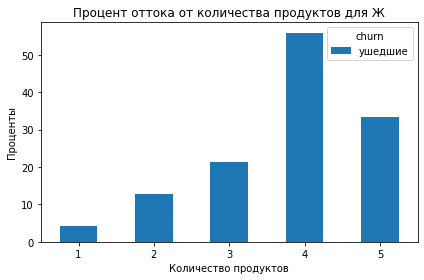

In [50]:
# Проверим женщин

plot_churn_by_products(df, 'Ж')

Можно выделить три интересные группы:

    Женщин с количеством продукта 4 где отток составляет 56%
    
    Мужчин с количеством продукта 4 где отток составляет 68%
    
    Мужчин с количеством продукта 5 где отток составляет 50%

In [51]:
#Посмотрим как распределяются отточные клиенты в зависимости от пола и от активности
df1=df.copy()
df1['churn'] = df1['churn'].replace({0: 'оставшиеся', 1: 'ушедшие'})
df1['last_activity'] = df1['last_activity'].replace({0: 'не активные', 1: 'активные'})
churn_categorical_count = df1.groupby(['gender', 'last_activity', 'churn']).size().unstack()
churn_categorical_count


churn                 оставшиеся  ушедшие
gender last_activity                     
Ж      активные             2132      506
       не активные          2215      129
М      активные             1806      771
       не активные          2002      412

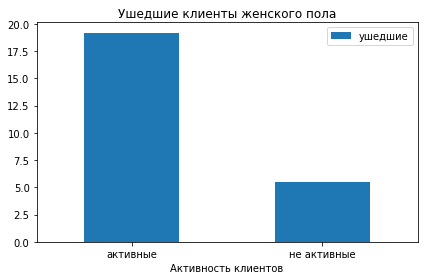

In [52]:
#Разберемся с женщинами

df2 = df1[df1['gender'] == 'Ж']
df2 = df2.drop(['gender'], axis=1)
#df2['churn'] = df2['churn'].replace({0: 'оставшиеся', 1: 'ушедшие'})
#df2['last_activity'] = df2['last_activity'].replace({0: 'не активные', 1: 'активные'})
churn_categorical_count = df2.groupby(['last_activity', 'churn']).size().unstack()


churn_categorical_count = churn_categorical_count.div(churn_categorical_count.sum(axis=1), axis=0) * 100

ax_curr = churn_categorical_count.plot(kind='bar', y=["ушедшие"], stacked=True)
ax_curr.set_title('Ушедшие клиенты женского пола')
ax_curr.set_ylabel('')
ax_curr.set_xlabel('Активность клиентов')
ax_curr.set_xticklabels(churn_categorical_count.index, rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
churn_categorical_count

churn,оставшиеся,ушедшие
last_activity,,
активные,80.818802,19.181198
не активные,94.496587,5.503413


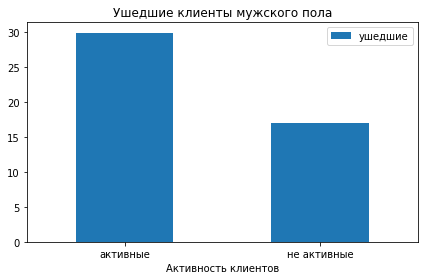

In [54]:
#Разберемся с мужчин
df2 = df1[df1['gender'] == 'М']
df2 = df2.drop(['gender'], axis=1)
#df2['churn'] = df2['churn'].replace({0: 'оставшиеся', 1: 'ушедшие'})
#df2['last_activity'] = df2['last_activity'].replace({0: 'не активные', 1: 'активные'})
churn_categorical_count = df2.groupby(['last_activity', 'churn']).size().unstack()


churn_categorical_count = churn_categorical_count.div(churn_categorical_count.sum(axis=1), axis=0) * 100

ax_curr = churn_categorical_count.plot(kind='bar', y=["ушедшие"], stacked=True)
ax_curr.set_title('Ушедшие клиенты мужского пола')
ax_curr.set_ylabel('')
ax_curr.set_xlabel('Активность клиентов')
ax_curr.set_xticklabels(churn_categorical_count.index, rotation=0)
plt.legend()

plt.tight_layout()
plt.show()



In [55]:
churn_categorical_count

churn,оставшиеся,ушедшие
last_activity,,
активные,70.081490,29.918510
не активные,82.932891,17.067109


В группироуке по активности клиентов выделить высокоотточных не возможно.


In [56]:
#Посмотрим как распределяются отточные клиенты в зависимости от пола и от возраста
df2 = df1[df1['gender'] == 'Ж']
df2 = df2.drop(['gender'], axis=1)

In [57]:
churn_categorical_count = df2.groupby(['age', 'churn']).size().unstack().fillna(0)
#churn_categorical_count = churn_categorical_count.drop(['gender'], axis=1) 
churn_categorical_count

churn,оставшиеся,ушедшие
age,,
18,3.0,0.0
19,8.0,0.0
20,7.0,1.0
21,5.0,1.0
22,9.0,0.0
...,...,...
81,4.0,0.0
82,2.0,0.0
83,3.0,0.0


churn  оставшиеся    ушедшие
age                         
18     100.000000   0.000000
19     100.000000   0.000000
20      87.500000  12.500000
21      83.333333  16.666667
22     100.000000   0.000000
..            ...        ...
81     100.000000   0.000000
82     100.000000   0.000000
83     100.000000   0.000000
84     100.000000   0.000000
86     100.000000   0.000000

[68 rows x 2 columns]


<Figure size 10800x504 with 0 Axes>

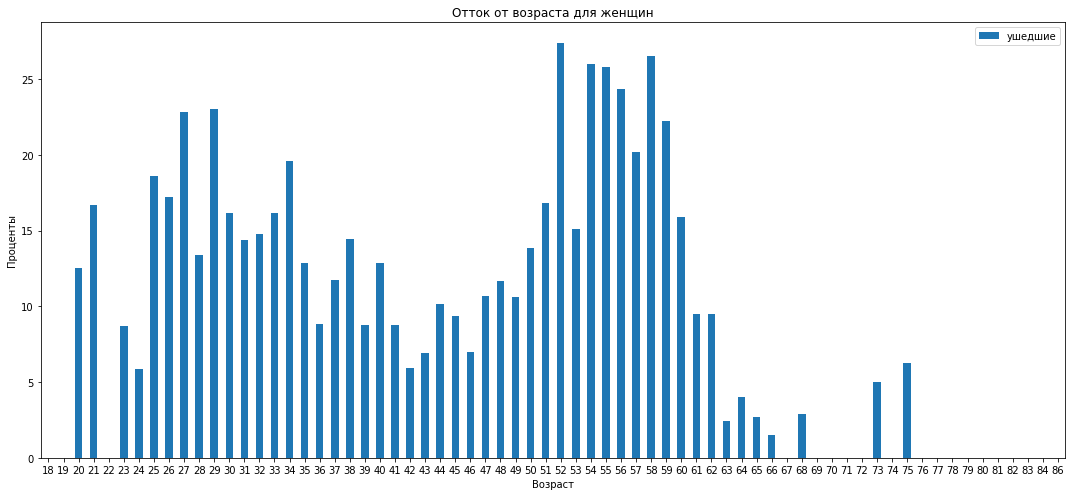

In [58]:
churn_categorical_count = churn_categorical_count.div(churn_categorical_count.sum(axis=1), axis=0) * 100

fig = plt.figure(figsize=(150, 7))
ax_curr = churn_categorical_count.plot(kind='bar', y=["ушедшие"], stacked=True, figsize=(15, 7))
ax_curr.set_title('Отток от возраста для женщин')
ax_curr.set_xlabel('Возраст')
ax_curr.set_ylabel('Проценты')
ax_curr.set_xticklabels(churn_categorical_count.index, rotation=0)
plt.legend()

print(churn_categorical_count)
plt.tight_layout()
plt.show()

In [59]:
churn_categorical_count = churn_categorical_count.loc[(48 <= churn_categorical_count.index) & (churn_categorical_count.index <= 59)]
churn_categorical_count

churn,оставшиеся,ушедшие
age,,
48,88.297872,11.702128
49,89.361702,10.638298
50,86.170213,13.829787
51,83.146067,16.853933
52,72.619048,27.380952
53,84.883721,15.116279
54,74.025974,25.974026
55,74.193548,25.806452
56,75.641026,24.358974


В разбивке по возрасту среди женщин:
Первую группу от 25 до 34 лет (максимальный отток 23%, что не на много превышает средний отток по банку).
Вторую группу 48 -59 лет (максимальный отток 27%, что не на много превышает средний отток по банку).

In [60]:
#Посмотрим как распределяются отточные клиенты в зависимости от пола и от возраста

df2 = df1[df1['gender'] == 'М']
df2 = df2.drop(['gender'], axis=1)

churn_categorical_count = df2.groupby(['age', 'churn']).size().unstack().fillna(0)
#churn_categorical_count = churn_categorical_count.drop(['gender'], axis=1) 
churn_categorical_count


churn,оставшиеся,ушедшие
age,,
18,9.0,1.0
19,7.0,1.0
20,13.0,2.0
21,6.0,3.0
22,14.0,4.0
23,27.0,3.0
24,44.0,11.0
25,74.0,23.0
26,68.0,29.0


churn  оставшиеся    ушедшие
age                         
18      90.000000  10.000000
19      87.500000  12.500000
20      86.666667  13.333333
21      66.666667  33.333333
22      77.777778  22.222222
23      90.000000  10.000000
24      80.000000  20.000000
25      76.288660  23.711340
26      70.103093  29.896907
27      64.912281  35.087719
28      71.093750  28.906250
29      71.323529  28.676471
30      77.931034  22.068966
31      75.135135  24.864865
32      75.829384  24.170616
33      79.908676  20.091324
34      73.593074  26.406926
35      76.036866  23.963134
36      80.630631  19.369369
37      76.293103  23.706897
38      77.639752  22.360248
39      77.595628  22.404372
40      85.869565  14.130435
41      75.949367  24.050633
42      79.096045  20.903955
43      82.432432  17.567568
44      85.483871  14.516129
45      89.320388  10.679612
46      72.972973  27.027027
47      90.697674   9.302326
48      80.000000  20.000000
49      77.173913  22.826087
50      76.041

<Figure size 10800x504 with 0 Axes>

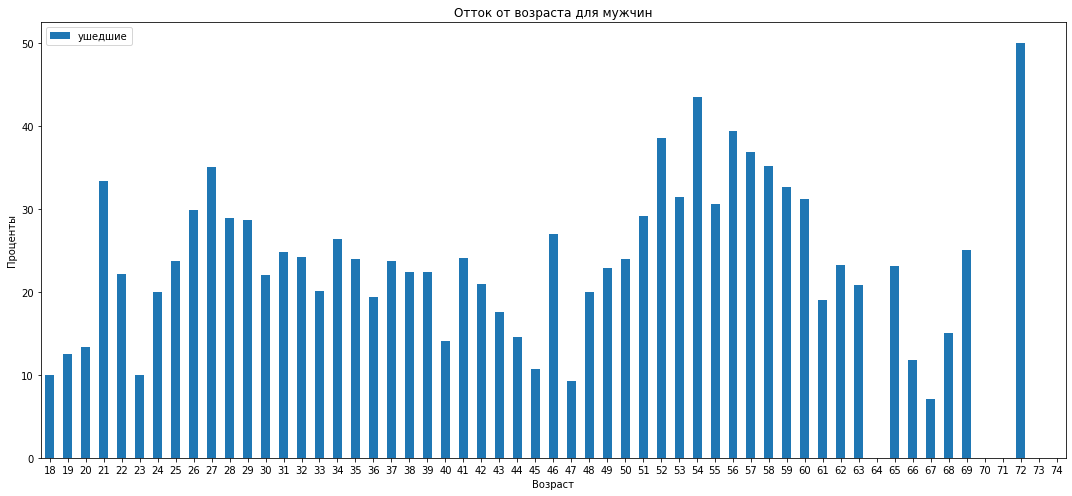

In [61]:

churn_categorical_count = churn_categorical_count.div(churn_categorical_count.sum(axis=1), axis=0) * 100

fig = plt.figure(figsize=(150, 7))
ax_curr = churn_categorical_count.plot(kind='bar', y=["ушедшие"], stacked=True, figsize=(15, 7))
ax_curr.set_title('Отток от возраста для мужчин')
ax_curr.set_xlabel('Возраст')
ax_curr.set_ylabel('Проценты')
ax_curr.set_xticklabels(churn_categorical_count.index, rotation=0)
plt.legend()

print(churn_categorical_count)
plt.tight_layout()
plt.show()

В разбивке по возрасту среди мужчин:
Первую группу от 21 до 29 лет (максимальный отток 35% что чуть меньше чем в два раза превышает средний отток по банку).
Вторую группу 48 -59 лет (максимальный отток 44% что чуть больше чем в два раза превышает средний отток по банку).


In [62]:
#Посмотрим как распределяются отточные клиенты в зависимости от пола и от баллов собственности
# рассмотрим женщин
df2 = df1[df1['gender'] == 'Ж']
df2 = df2.drop(['gender'], axis=1)
churn_categorical_count = df2.groupby(['equity', 'churn']).size().unstack().fillna(0)
#churn_categorical_count = churn_categorical_count.drop(['gender'], axis=1) 
churn_categorical_count



churn,оставшиеся,ушедшие
equity,,
0,1150,39
1,367,29
2,485,65
3,711,117
4,790,165
5,756,187
6,53,17
7,25,12
8,7,1


churn,оставшиеся,ушедшие
equity,,
0,96.719933,3.280067
1,92.676768,7.323232
2,88.181818,11.818182
3,85.869565,14.130435
4,82.722513,17.277487
5,80.169671,19.830329
6,75.714286,24.285714
7,67.567568,32.432432
8,87.500000,12.500000


<Figure size 10800x504 with 0 Axes>

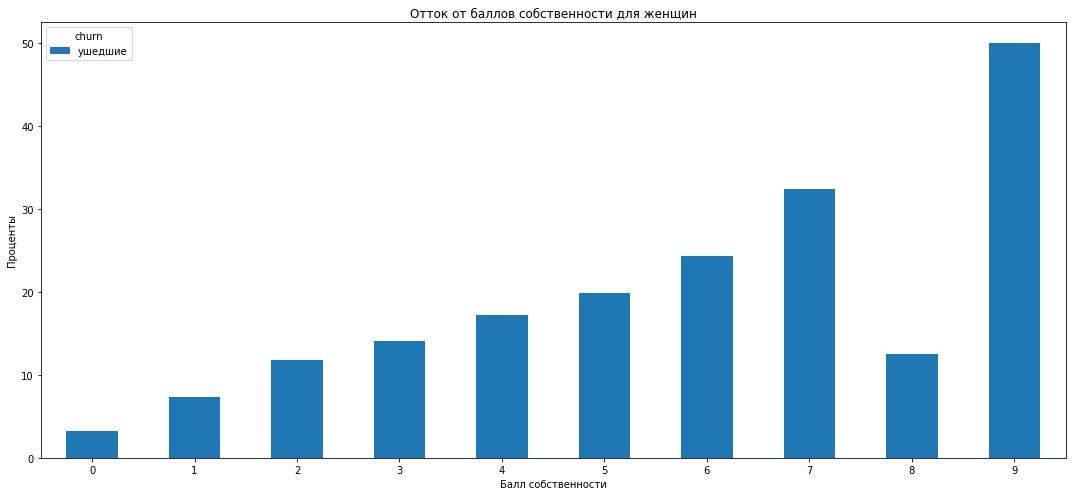

In [63]:
churn_categorical_count = churn_categorical_count.div(churn_categorical_count.sum(axis=1), axis=0) * 100

fig = plt.figure(figsize=(150, 7))
ax_curr = churn_categorical_count.plot(kind='bar', y=["ушедшие"], stacked=True, figsize=(15, 7))
ax_curr.set_title('Отток от баллов собственности для женщин')
ax_curr.set_xlabel('Балл собственности')
ax_curr.set_ylabel('Проценты')
ax_curr.set_xticklabels(churn_categorical_count.index, rotation=0)

display(churn_categorical_count)
plt.tight_layout()
plt.show()

In [64]:
# рассмотрим мужчин
df2 = df1[df1['gender'] == 'М']
df2 = df2.drop(['gender'], axis=1)
churn_categorical_count = df2.groupby(['equity', 'churn']).size().unstack().fillna(0)
#churn_categorical_count = churn_categorical_count.drop(['gender'], axis=1) 
churn_categorical_count

churn,оставшиеся,ушедшие
equity,,
0,1336,51
1,313,64
2,400,101
3,508,204
4,593,299
5,583,389
6,50,41
7,18,25
8,4,5


churn,оставшиеся,ушедшие
equity,,
0,96.322999,3.677001
1,83.023873,16.976127
2,79.840319,20.159681
3,71.348315,28.651685
4,66.479821,33.520179
5,59.979424,40.020576
6,54.945055,45.054945
7,41.860465,58.139535
8,44.444444,55.555556


<Figure size 10800x504 with 0 Axes>

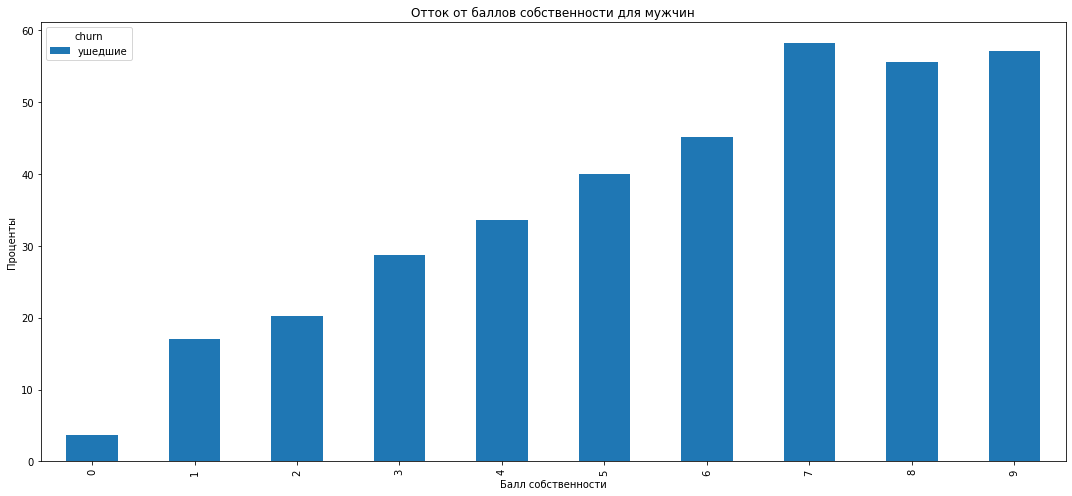

In [65]:
churn_categorical_count = churn_categorical_count.div(churn_categorical_count.sum(axis=1), axis=0) * 100

fig = plt.figure(figsize=(150, 7))
ax_curr = churn_categorical_count.plot(kind='bar', y=["ушедшие"], stacked=True, figsize=(15, 7))
ax_curr.set_title('Отток от баллов собственности для мужчин')
ax_curr.set_xlabel('Балл собственности')
ax_curr.set_ylabel('Проценты')


display(churn_categorical_count)
plt.tight_layout()
plt.show()

Как видно есть несколько интересных категорий людей с  высоким процентом оттока.

1. женщины с баллом собственности 9 , отток составил 50%
2. мужчины с баллом собственности 7-9 , отток составил более 55%

In [66]:
#Посмотрим как распределяются отточные клиенты в зависимости от пола и от наличия кредитки
# рассмотрим женщин
df2 = df1[df1['gender'] == 'Ж']
df2 = df2.drop(['gender'], axis=1)
churn_categorical_count = df2.groupby(['credit_card', 'churn']).size().unstack().fillna(0)
#churn_categorical_count = churn_categorical_count.drop(['gender'], axis=1) 
churn_categorical_count

churn,оставшиеся,ушедшие
credit_card,,
0,1528,358
1,2819,277


churn,оставшиеся,ушедшие
credit_card,,
0,81.018028,18.981972
1,91.052972,8.947028


<Figure size 10800x504 with 0 Axes>

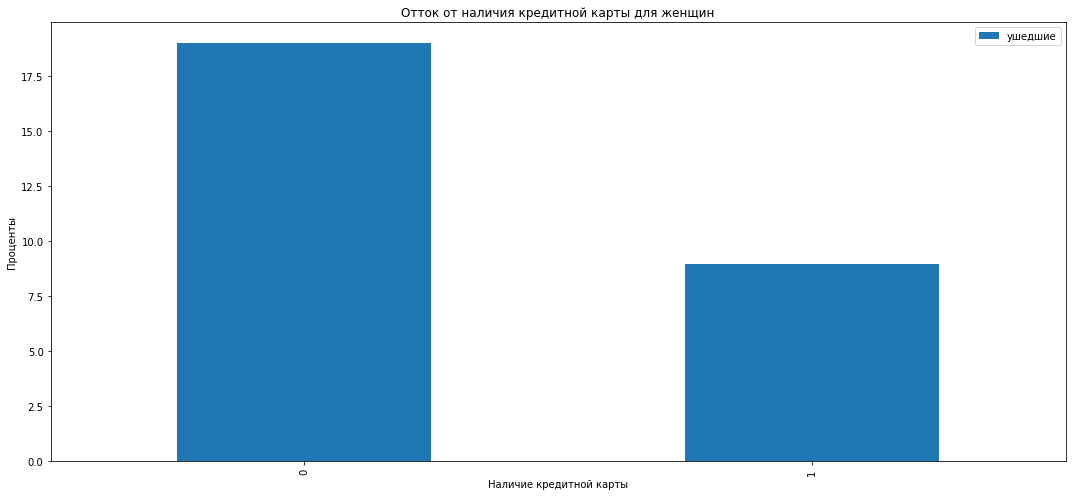

In [67]:
churn_categorical_count = churn_categorical_count.div(churn_categorical_count.sum(axis=1), axis=0) * 100

fig = plt.figure(figsize=(150, 7))
ax_curr = churn_categorical_count.plot(kind='bar', y=["ушедшие"], stacked=True, figsize=(15, 7))
ax_curr.set_title('Отток от наличия кредитной карты для женщин')
ax_curr.set_xlabel('Наличие кредитной карты')
ax_curr.set_ylabel('Проценты')
plt.legend()

display(churn_categorical_count)
plt.tight_layout()
plt.show()

In [68]:
# рассмотрим мужчин
df2 = df1[df1['gender'] == 'М']
df2 = df2.drop(['gender'], axis=1)
churn_categorical_count = df2.groupby(['credit_card', 'churn']).size().unstack().fillna(0)
#churn_categorical_count = churn_categorical_count.drop(['gender'], axis=1) 
churn_categorical_count

churn,оставшиеся,ушедшие
credit_card,,
0,846,457
1,2962,726


churn,оставшиеся,ушедшие
credit_card,,
0,64.927091,35.072909
1,80.314534,19.685466


<Figure size 10800x504 with 0 Axes>

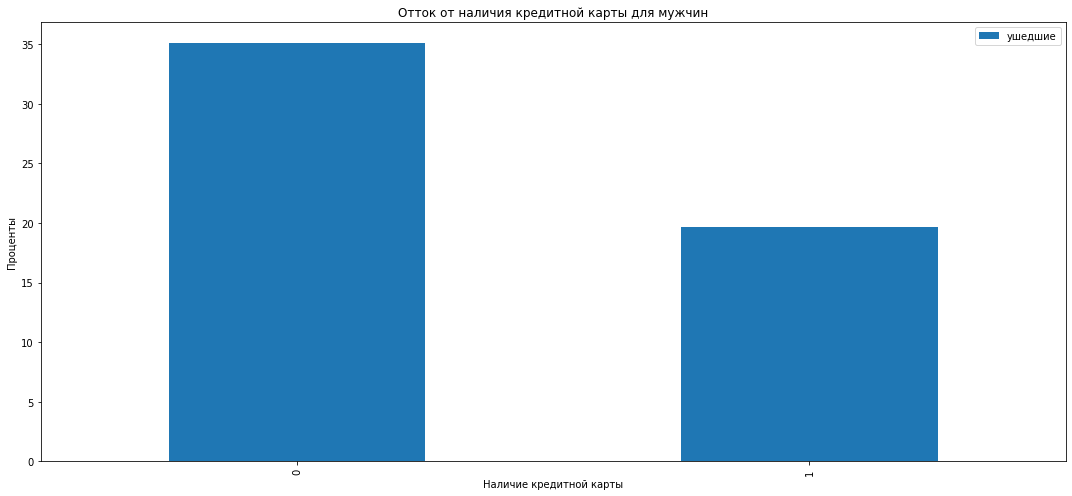

In [69]:
churn_categorical_count = churn_categorical_count.div(churn_categorical_count.sum(axis=1), axis=0) * 100

fig = plt.figure(figsize=(150, 7))
ax_curr = churn_categorical_count.plot(kind='bar', y=["ушедшие"], stacked=True, figsize=(15, 7))
ax_curr.set_title('Отток от наличия кредитной карты для мужчин')
ax_curr.set_xlabel('Наличие кредитной карты')
ax_curr.set_ylabel('Проценты')
plt.legend()

display(churn_categorical_count)
plt.tight_layout()
plt.show()

В графе кредитные карты найти отточные группы не удалось

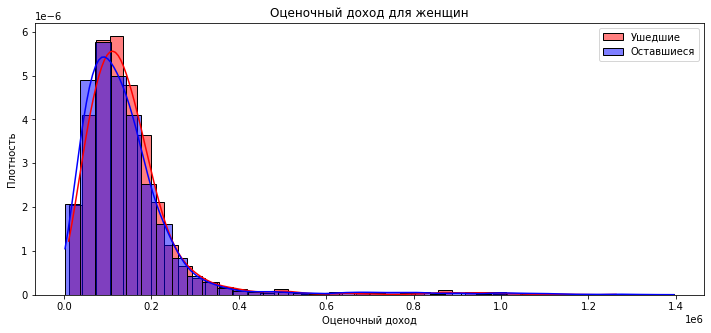

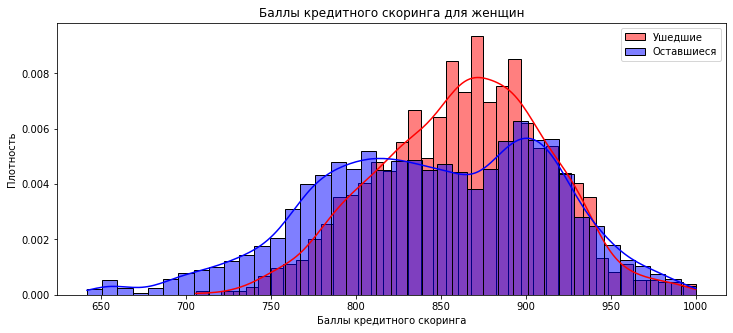

In [70]:
#выделим не категорийные значения и построим распределения в разрезе оттока клиентов для женщин

columns = [
    'est_salary', 'score'
           ]
column_name = {'est_salary': 'Оценочный доход', 'score': 'Баллы кредитного скоринга', 'age': 'Возраст'}

df1=df[df['gender_Ж']==1]
warnings.filterwarnings("ignore")
for column in columns: 
    plt.figure(figsize=(12,5)) 
    sns.histplot(data=df[df['churn']==1][column], label='Ушедшие', kde=True, color='red', 
                 stat="density", common_norm=False, bins=40)
    sns.histplot(data=df[df['churn']==0][column], label='Оставшиеся', kde=True, color='blue', 
                 stat="density", common_norm=False, bins=40)
    plt.ylabel('Плотность')
    plt.xlabel(column_name[column])
    plt.title(column_name[column] + ' для женщин')
    plt.legend()
    plt.show()


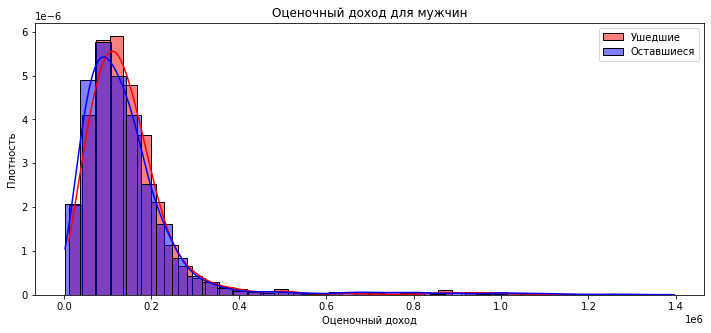

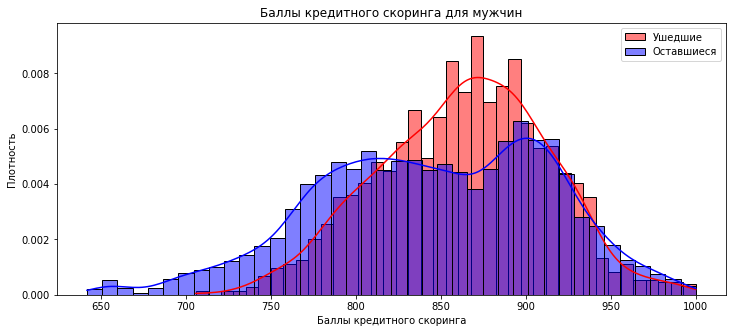

In [71]:
#выделим не категорийные значения и построим распределения в разрезе оттока клиентов для мужчин

columns = ['est_salary', 'score']
df1 = df[df['gender_М'] == 1]

column_name = {'est_salary': 'Оценочный доход', 'score': 'Баллы кредитного скоринга', 'age': 'Возраст'}
warnings.filterwarnings("ignore")

for column in columns: 
    plt.figure(figsize=(12,5)) 
    sns.histplot(data=df[df['churn']==1][column], label='Ушедшие', kde=True, color='red', 
                 stat="density", common_norm=False, bins=40)
    sns.histplot(data=df[df['churn']==0][column], label='Оставшиеся', kde=True, color='blue', 
                 stat="density", common_norm=False, bins=40)
    plt.ylabel('Плотность')
    plt.xlabel(column_name[column])
    plt.title(column_name[column] + ' для мужчин')
    plt.legend()
    plt.show()

По оценочному доходу выделить отточные сегменты не удалось. По баллам кредитного скоринга можно диапазон от 850 до 900 для мужчин и женщин.

In [72]:
# количество отточных мужчин с баллами 850-900
df1 = df[(850 < df['score']) & (df['score'] > 900)&(df['gender_М'] == 1)]
df2 = df1.groupby(['gender_М', 'churn']).size().unstack()

df2

churn,0,1
gender_М,,
1,999,286


In [73]:
df2 = df2.div(df2.sum(axis=1), axis=0) * 100
df2

churn,0,1
gender_М,,
1,77.743191,22.256809


In [74]:
# количество отточных женщин с баллами 850-900
df1 = df[(850 < df['score']) & (df['score'] > 900)&(df['gender_Ж'] == 1)]
df2 = df1.groupby(['gender_Ж', 'churn']).size().unstack()

df2

churn,0,1
gender_Ж,,
1,997,137


In [75]:
df2 = df2.div(df2.sum(axis=1), axis=0) * 100
df2

churn,0,1
gender_Ж,,
1,87.918871,12.081129


Процент оттока среди мужчин и женщин с баллами кредитного скоринга очень мал (22% и 12%)

In [76]:
# Рассмотрим поближе распределение 'balance', отфильтруем заглушку и нулевые значения
df1 = dfb[(dfb['balance'] < 3000000)&(df['gender_М'] == 1)]


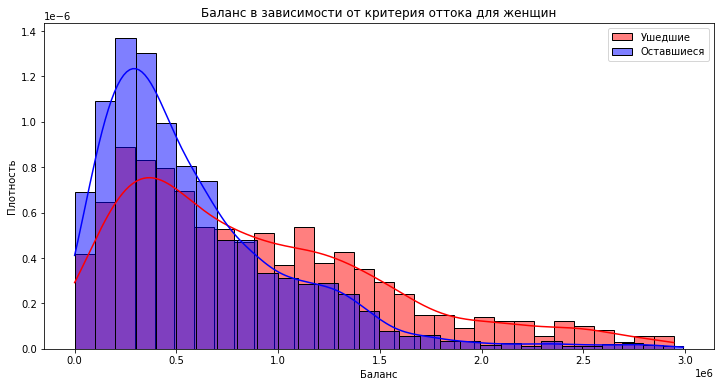

In [77]:
plt.figure(figsize=(12,6)) 
plt.title('balance')
sns.histplot(data=df1[df1['churn']==1]['balance'], label='Ушедшие', kde=True, color='red', bins=30, stat="density", common_norm=False)
sns.histplot(data=df1[df1['churn']==0]['balance'], label='Оставшиеся', kde=True, color='blue', bins=30, stat="density", common_norm=False)
plt.ylabel('Плотность')
plt.xlabel('Баланс')
plt.title('Баланс в зависимости от критерия оттока для женщин')
plt.legend()
plt.show()

In [78]:
#Процент ушедших мужчин начинает превалировать начиная с 1000000 у.е. 
df1 = df[(0 < df['balance']) & (df['balance'] > 1000000)&(df['gender_М'] == 1)]
df2 = df1.groupby(['gender_М', 'churn']).size().unstack()

df2

churn,0,1
gender_М,,
1,497,477


In [79]:
df2 = df2.div(df2.sum(axis=1), axis=0) * 100
df2

churn,0,1
gender_М,,
1,51.026694,48.973306


По баллансу можно выделить высокоотточную группу среди мужчин с балансом выше 1000000 у.е. (отток 49% и чуть менее 1000 клиентов)

In [80]:
# Рассмотрим поближе распределение 'balance', отфильтруем заглушку и нулевые значения
df1 = df[(0 < df['balance']) & (df['balance'] < 3000000)&(df['gender_Ж'] == 1)]

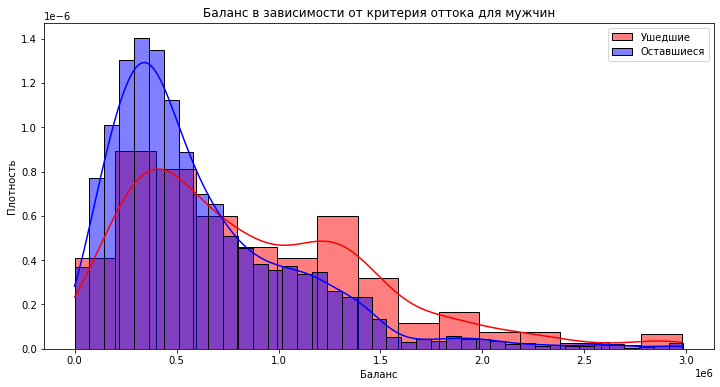

In [81]:
plt.figure(figsize=(12,6)) 
plt.title('balance')
sns.histplot(data=df1[df1['churn']==1]['balance'], label='Ушедшие', kde=True, color='red', stat="density", common_norm=False)
sns.histplot(data=df1[df1['churn']==0]['balance'], label='Оставшиеся', kde=True, color='blue', stat="density", common_norm=False)
plt.ylabel('Плотность')
plt.xlabel('Баланс')
plt.title('Баланс в зависимости от критерия оттока для мужчин')
plt.legend()
plt.show()

In [82]:
#Процент ушедших женщин начинает превалировать начиная с 1200000 у.е. 
df1 = df[(0 < df['balance']) & (df['balance'] > 1200000)&(df['gender_Ж'] == 1)]
df2 = df1.groupby(['gender_Ж', 'churn']).size().unstack()

df2

churn,0,1
gender_Ж,,
1,419,189


In [83]:
df2 = df2.div(df2.sum(axis=1), axis=0) * 100
df2

churn,0,1
gender_Ж,,
1,68.914474,31.085526


По баллансу можно выделить высокоотточную группу среди женщин с балансом выше 1200000 у.е. (отток 31% и около 600 клиентов)

Выводы по подразделу:

    Средний возраст отточных клиентов 41-42 года. Средний возраст неотточных клиентов 43-44 года

    Средний score отточных клиентов 863-864.
    
    Средний баланс отточный клиентов составляет 1134458 у.е.

    Средний оценочный доход отточных и не отточных сильно не отличается.

  По категорийным значениям есть отличия у отточных в:

     колличестве баллов собственности 4 против не отточных, у которых 3,

     активности 1 против не отточных, у которых 0,

     поле у отточных преобладают мужчины, у не отточных женщины.

     По городам (Ярославль, Ростов, Рыбинск) процент оставшихся клиентов одинаков и находится в пределах 15-20%.

     В разбивки по полу тоже ничего интересного не видно, женщин ушло 13%, мужчин - 24%.

     А вот с увеличением количества или стоимости собственноти процент оттока растет с 3% до 54%, что уже превышает в два раза      средний отток по банку в 18,24%.

     С количеством продуктов банка еще интереснее. Процент оттока растет с ростом количества продуктов и достигает максимум в        63% с количеством продуктов банка 4. На 5 продуктах картина выравнивается и процент оттока уменьшается до 42%. Если            сравнивать со средним оттоком по банку, то даже у клиентов с количеством продуктов 5 отток превышает в два раза средние        показатели по банку.

    По наличию кредитных карт и последней активности высокоотточных сегментов не выявлено (отток колеблется от 11% до 24%)

В разбивке по количеству продуктов, можно выделить:

    Женщин с количеством продукта 4 где отток составляет 56%
    
    Мужчин с количеством продукта 4 где отток составляет 68%
    
    Мужчин с количеством продукта 5 где отток составляет 50%
    
По баллам собственности:

    женщины с баллом собственности 9 , отток составил 50%

    мужчины с баллом собственности 7-9 , отток составил более 55%

В графе кредитные карты найти отточные группы не удалось

По оценочному доходу выделить отточные сегменты не удалось. По баллам кредитного скоринга можно диапазон от 850 до 900 для мужчин и женщин. Процент оттока среди мужчин и женщин с баллами кредитного скоринга очень мал (22% и 12%), что сравнимо с оттоком во всем банке вцелом.

По баллансу можно выделить высокоотточную группу среди мужчин с балансом выше 1000000 у.е. (отток 49% и чуть менее 1000 клиентов) и женщин с балансом выше 1200000 у.е. (отток 31% и около 600 клиентов)



### Портрет городов

            sum  count       perc
city                             
Ростов      265   1416  18.714689
Рыбинск     436   2682  16.256525
Ярославль  1117   5875  19.012766


<AxesSubplot:title={'center':'Процент ушедших клиентов в разбивке по городам'}, xlabel='Город', ylabel='Процент ушедших клиентов'>

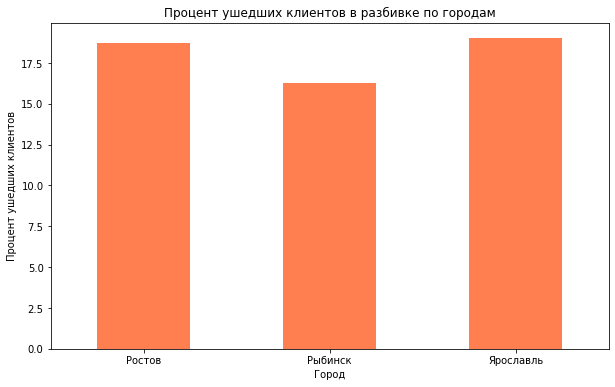

In [84]:
# подготовим таблицу
city_churn = df.pivot_table (index = 'city', values = 'churn', aggfunc = ['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['perc'] = city_churn['sum']/city_churn['count']*100
print(city_churn)
warnings.filterwarnings("ignore")
city_churn['perc'].plot(
    kind='bar',
    title='Процент ушедших клиентов в разбивке по городам',
    xlabel='Город', ylabel='Процент ушедших клиентов',
    figsize=(10,6),
    color='coral',
    rot=0
)


Процент ушедших клиентов по городам маленький и колеблется в диапазоне от 16% до 19%. 
Это говорит о том что нет проблем только в одном городе.

In [85]:
# посмотрим как распределяются отточные клиенты в городах в разбивке по полу
city_churn = df.pivot_table (index = ['city', 'gender'], values = 'churn', aggfunc = ['sum', 'count']).reset_index()
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['perc'] = city_churn['sum']/city_churn['count']*100
print(city_churn)


        city gender  sum  count       perc
0     Ростов      Ж   90    733  12.278308
1     Ростов      М  175    683  25.622255
2    Рыбинск      Ж  138   1373  10.050983
3    Рыбинск      М  298   1309  22.765470
4  Ярославль      Ж  407   2876  14.151599
5  Ярославль      М  710   2999  23.674558


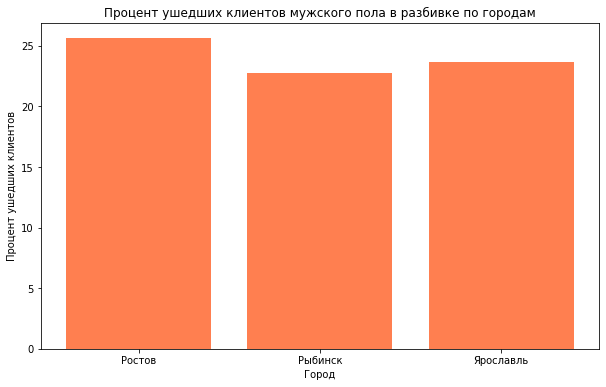

In [86]:
# Построим распределение для мужчин
filtered_city_churn = city_churn[city_churn['gender'] == 'М']
plt.figure(figsize=(10, 6))
plt.bar(filtered_city_churn['city'], filtered_city_churn['perc'], color='coral')
plt.title('Процент ушедших клиентов мужского пола в разбивке по городам')
plt.xlabel('Город')
plt.ylabel('Процент ушедших клиентов')
plt.xticks(rotation=0)
plt.show()

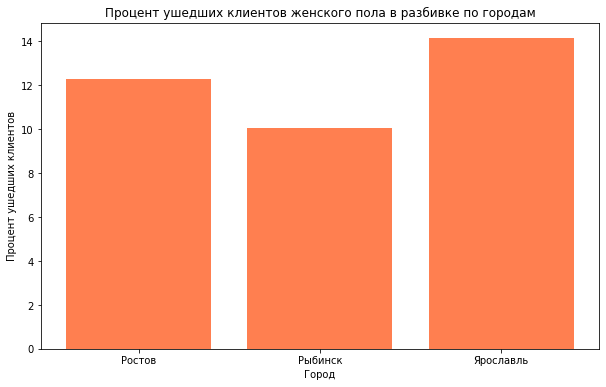

In [87]:
# Построим распределение для женщин
filtered_city_churn = city_churn[city_churn['gender'] == 'Ж']
plt.figure(figsize=(10, 6))
plt.bar(filtered_city_churn['city'], filtered_city_churn['perc'], color='coral')
plt.title('Процент ушедших клиентов женского пола в разбивке по городам')
plt.xlabel('Город')
plt.ylabel('Процент ушедших клиентов')
plt.xticks(rotation=0)
plt.show()

Выявить отточных клиентов в городах в разбивке по полу не удалось. По статистике в городах больше оттока среди мужского населения.

                    sum  count        perc
city      products                        
Ростов    1          49    444   11.036036
          2         152    805   18.881988
          3          27     95   28.421053
          4          37     68   54.411765
          5           0      4    0.000000
Рыбинск   1          56    857    6.534422
          2         280   1560   17.948718
          3          35    165   21.212121
          4          64     99   64.646465
          5           1      1  100.000000
Ярославль 1         130   2022    6.429278
          2         546   2754   19.825708
          3         235    778   30.205656
          4         199    307   64.820847
          5           7     14   50.000000


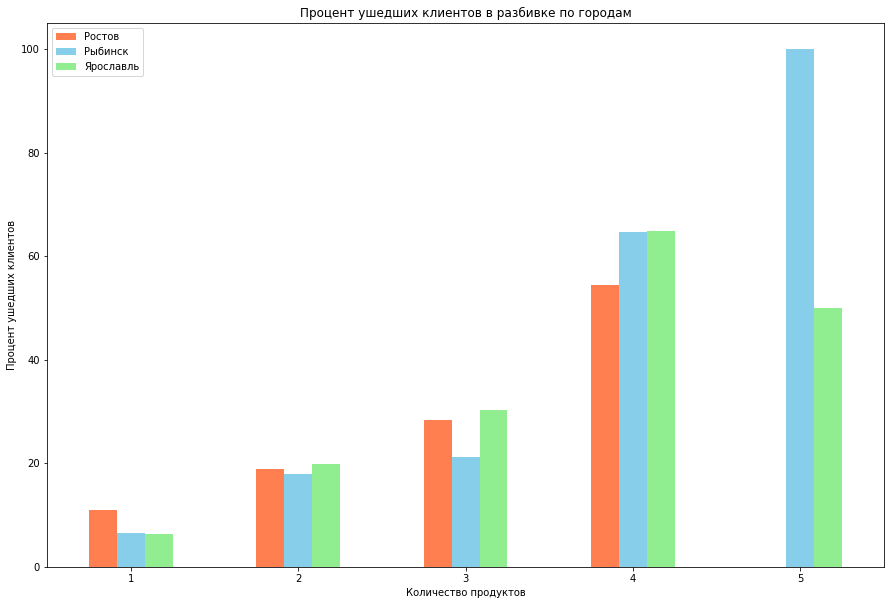

In [88]:
# посмотрим как распределяются отточные клиенты в городах в разбивке по продуктам
df1=df[df['products']>0]
city_churn = df1.pivot_table (index = ['city', 'products'], values = 'churn', aggfunc = ['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['perc'] = city_churn['sum']/city_churn['count']*100

print(city_churn)

warnings.filterwarnings("ignore")
city_churn.unstack(level=0)['perc'].plot (
kind='bar', title = 'Процент ушедших клиентов в разбивке по городам',
xlabel = 'Количество продуктов', ylabel = 'Процент ушедших клиентов', figsize = (15,10), 
color = ['coral', 'skyblue', 'lightgreen'], rot=0, legend=True)
plt.legend()

В разбивке по продуктам и городам виден большой отток с количеством продукта от 4 и выше.

                       sum  count       perc
city      credit_card                       
Ростов    0            133    612  21.732026
          1            132    804  16.417910
Рыбинск   0            213    961  22.164412
          1            223   1721  12.957583
Ярославль 0            469   1616  29.022277
          1            648   4259  15.214839


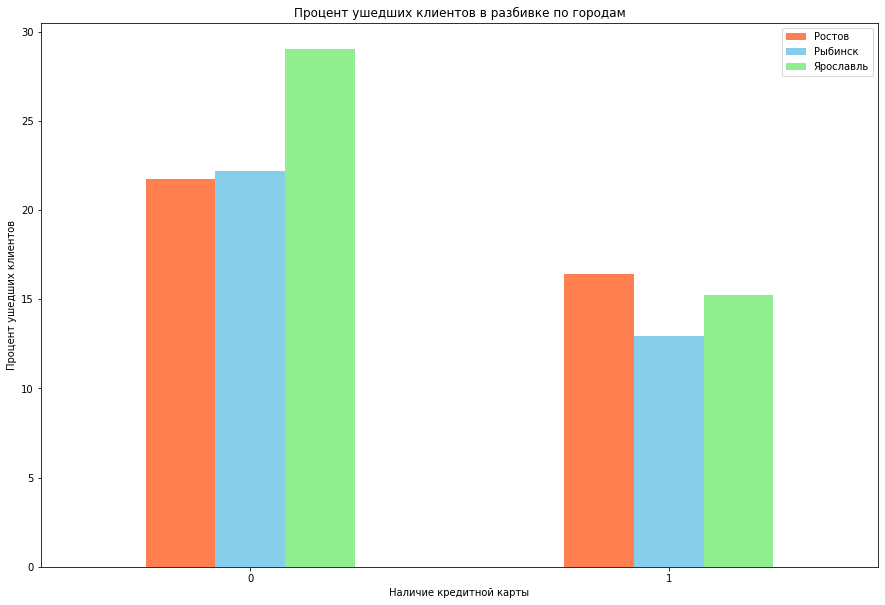

In [89]:
# посмотрим как распределяются отточные клиенты в городах в разбивке по наличию кредитки

city_churn = df.pivot_table (index = ['city', 'credit_card'], values = 'churn', aggfunc = ['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['perc'] = city_churn['sum']/city_churn['count']*100
print(city_churn)
warnings.filterwarnings("ignore")
city_churn.unstack(level=0)['perc'].plot (
kind='bar', title = 'Процент ушедших клиентов в разбивке по городам',
xlabel = 'Наличие кредитной карты', ylabel = 'Процент ушедших клиентов', figsize = (15,10), 
color = ['coral', 'skyblue', 'lightgreen'], rot=0)
plt.legend()

В разбивке по наличию кредитной карты и городам высокоотточных сегментов не замечено

                         sum  count       perc
city      last_activity                       
Ростов    0               90    663  13.574661
          1              175    753  23.240372
Рыбинск   0              112   1172   9.556314
          1              324   1510  21.456954
Ярославль 0              339   2923  11.597674
          1              778   2952  26.355014


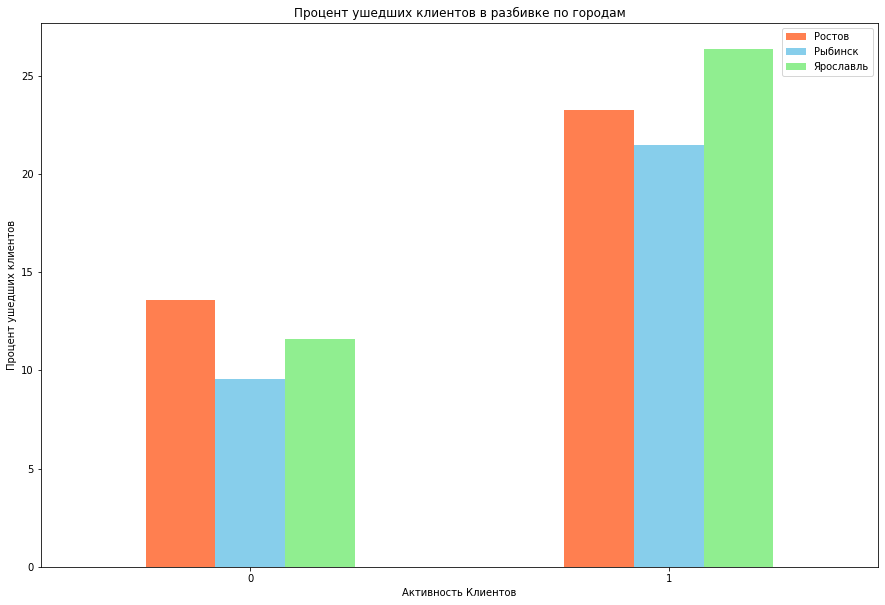

In [90]:
# посмотрим как распределяются отточные клиенты в городах в разбивке по последней активности

city_churn = df.pivot_table (index = ['city', 'last_activity'], values = 'churn', aggfunc = ['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['perc'] = city_churn['sum']/city_churn['count']*100
print(city_churn)
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")
city_churn.unstack(level=0)['perc'].plot (
kind='bar', title = 'Процент ушедших клиентов в разбивке по городам',
xlabel = 'Активность Клиентов', ylabel = 'Процент ушедших клиентов', figsize = (15,10), 
color = ['coral', 'skyblue', 'lightgreen'], rot=0)
plt.legend()

В разбивке по последней активности и городам высокоотточных сегментов не замечено.

                  sum  count       perc
city      equity                       
Ростов    0        11    285   3.859649
          1        16    123  13.008130
          2        31    164  18.902439
          3        48    253  18.972332
          4        72    269  26.765799
          5        76    276  27.536232
          6         6     28  21.428571
          7         2     12  16.666667
          8         1      3  33.333333
          9         2      3  66.666667
Рыбинск   0        29    677   4.283604
          1        29    224  12.946429
          2        41    289  14.186851
          3        75    412  18.203883
          4       111    519  21.387283
          5       129    501  25.748503
          6        13     35  37.142857
          7         7     19  36.842105
          8         2      4  50.000000
          9         0      2   0.000000
Ярославль 0        50   1614   3.097893
          1        48    426  11.267606
          2        94    598  15.719064


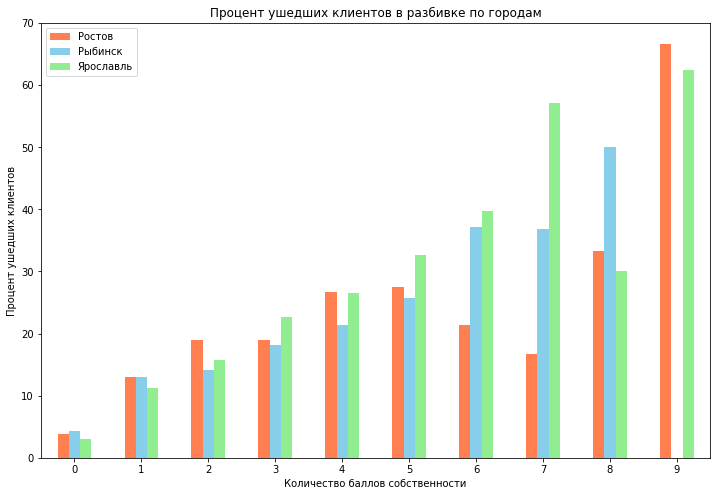

In [91]:
# посмотрим как распределяются отточные клиенты в городах в разбивке по колличеству баллов собственности

city_churn = df.pivot_table (index = ['city', 'equity'], values = 'churn', aggfunc = ['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['perc'] = city_churn['sum']/city_churn['count']*100
print(city_churn)
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")
city_churn.unstack(level=0)['perc'].plot (
kind='bar', title = 'Процент ушедших клиентов в разбивке по городам',
xlabel = 'Количество баллов собственности', ylabel = 'Процент ушедших клиентов', figsize = (12, 8), 
color = ['coral', 'skyblue', 'lightgreen'], rot=0)
plt.legend()

В разбивке по колличеству баллов собственности и городам наблюдается высокий отток клиентов с баллом 9. Также наблюдается высокий отток клиентов с баллом 7 в Ярославле и 8 в Рыбинске.

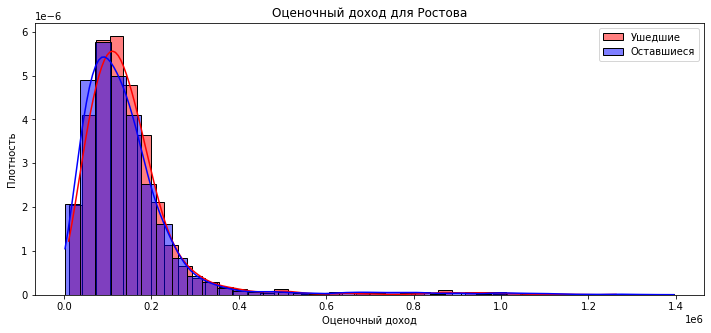

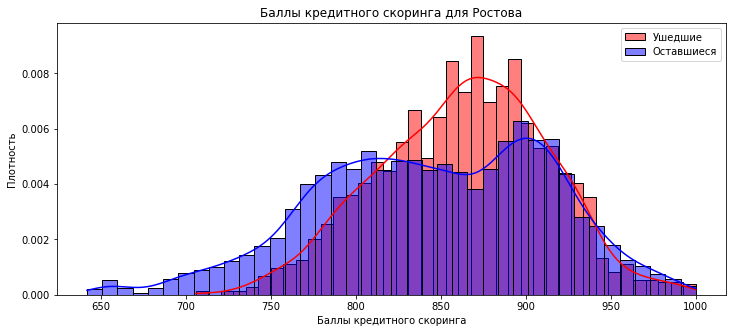

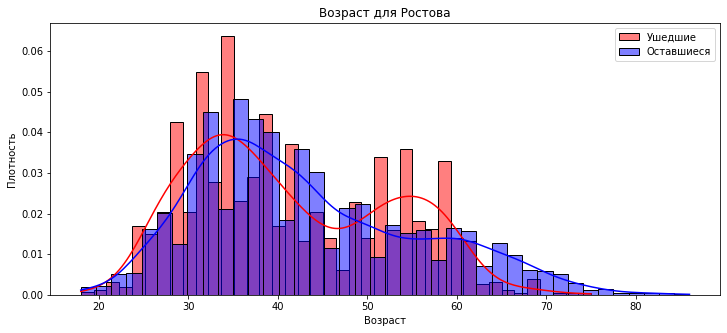

In [92]:
#выделим не категорийные значения и построим распределения в разрезе оттока клиентов для Ростова

columns = [
    'est_salary', 'score', 'age'
           ]

df1=df[df['city_Ростов']==1]
column_name = {'est_salary': 'Оценочный доход', 'score': 'Баллы кредитного скоринга', 'age': 'Возраст'}


warnings.filterwarnings("ignore")
for column in columns: 
    plt.figure(figsize=(12,5)) 
    plt.title(column)
    sns.histplot(data=df[df['churn']==1][column], label='Ушедшие', kde=True, color='red', 
                 stat="density", common_norm=False, bins=40)
    sns.histplot(data=df[df['churn']==0][column], label='Оставшиеся', kde=True, color='blue', 
                 stat="density", common_norm=False, bins=40)
    plt.ylabel('Плотность')
    plt.xlabel(column_name[column])
    plt.title(column_name[column] + ' для Ростова')
    plt.legend()
    plt.show()

Для оценочного дохода и возраста для Ростова выделить отточные сегменты не удалось. По баллам кредитного скоринга есть высокоотточный сегмент от 850 до 900.

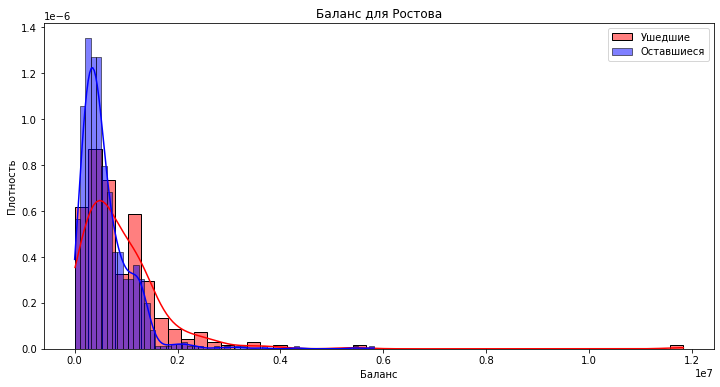

In [93]:
# Рассмотрим поближе распределение 'balance', отфильтруем заглушку и нулевые значения
df1 = dfb[ dfb['city_Ростов']==1]
plt.figure(figsize=(12,6)) 
plt.title('balance')
sns.histplot(data=df1[df1['churn']==1]['balance'], label='Ушедшие', kde=True, color='red', stat="density", common_norm=False)
sns.histplot(data=df1[df1['churn']==0]['balance'], label='Оставшиеся', kde=True, color='blue', stat="density", common_norm=False)
plt.ylabel('Плотность')
plt.xlabel('Баланс')
plt.title('Баланс для Ростова')
plt.legend()
plt.show()

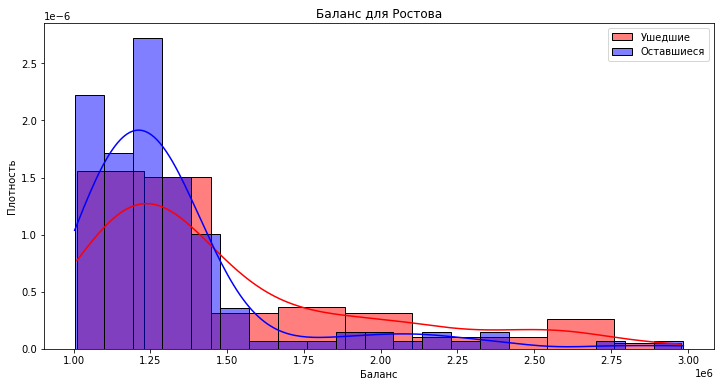

In [94]:
# Применим фильтр в балансу
df1 = dfb[(3000000 > dfb['balance']) & (dfb['balance'] > 1000000)&(dfb['city_Ростов']==1)]
plt.figure(figsize=(12,6)) 
plt.title('balance')
sns.histplot(data=df1[df1['churn']==1]['balance'], label='Ушедшие', kde=True, color='red', stat="density", common_norm=False)
sns.histplot(data=df1[df1['churn']==0]['balance'], label='Оставшиеся', kde=True, color='blue', stat="density", common_norm=False)
plt.ylabel('Плотность')
plt.xlabel('Баланс')
plt.title('Баланс для Ростова')
plt.legend()
plt.show()

В Ростове можно выделить клиентов с балансом более 1 500000 у.е., когда количество ушедших превышает процент оставшихся.

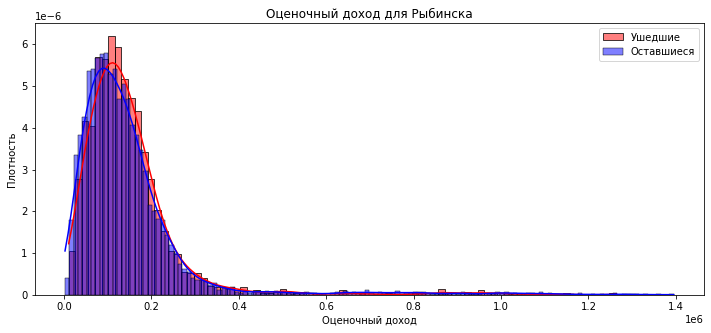

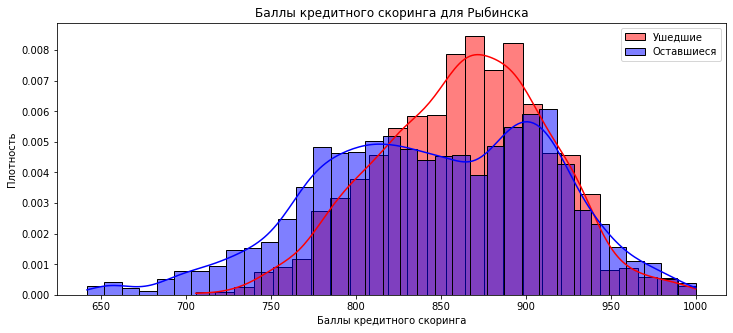

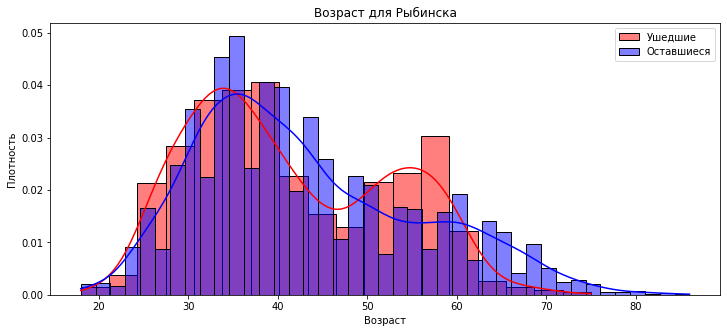

In [95]:
#выделим не категорийные значения и построим распределения в разрезе оттока клиентов для Рыбинска

columns = [
    'est_salary', 'score', 'age'
           ]
df1=df[df['city_Рыбинск']==1]
column_name = {'est_salary': 'Оценочный доход', 'score': 'Баллы кредитного скоринга', 'age': 'Возраст'}


warnings.filterwarnings("ignore")
for column in columns: 
    plt.figure(figsize=(12,5)) 
    plt.title(column)
    sns.histplot(data=df[df['churn']==1][column], label='Ушедшие', kde=True, color='red', 
                 stat="density", common_norm=False)
    sns.histplot(data=df[df['churn']==0][column], label='Оставшиеся', kde=True, color='blue', 
                 stat="density", common_norm=False)
    plt.ylabel('Плотность')
    plt.xlabel(column_name[column])
    plt.title(column_name[column] + ' для Рыбинска')
    plt.legend()
    plt.show()

Для оценочного дохода и возраста для Рыбинска выделить отточные сегменты не удалось. По баллам кредитного скоринга есть высокоотточный сегмент от 830 до 900.

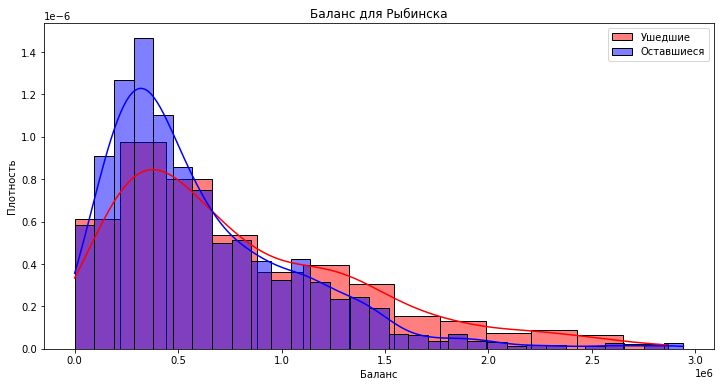

In [96]:
# Рассмотрим поближе распределение 'balance', отфильтруем заглушку и нулевые значения
df1 = dfb[(dfb['balance'] < 3000000)&(dfb['city_Рыбинск']==1)]
plt.figure(figsize=(12,6)) 
plt.title('balance')
sns.histplot(data=df1[df1['churn']==1]['balance'], label='Ушедшие', kde=True, color='red', stat="density", common_norm=False)
sns.histplot(data=df1[df1['churn']==0]['balance'], label='Оставшиеся', kde=True, color='blue', stat="density", common_norm=False)
plt.ylabel('Плотность')
plt.xlabel('Баланс')
plt.title('Баланс для Рыбинска')
plt.legend()
plt.show()

В Рыбинске среди категорийных данных можно выделить только клиентов с балансом более 1 600000 у.е., когда количество ушедших превышает процент оставшихся.

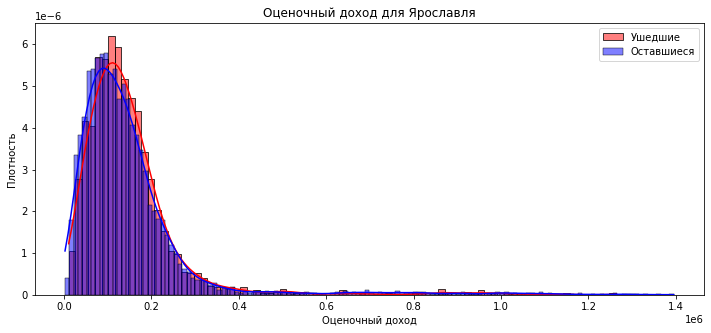

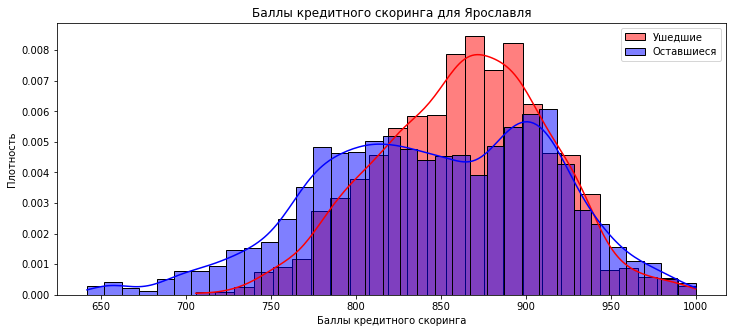

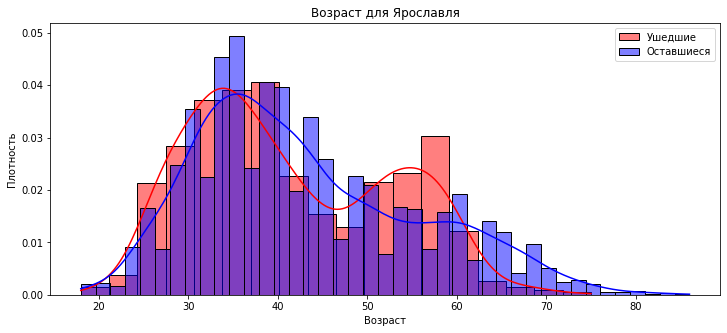

In [97]:
#выделим не категорийные значения и построим распределения в разрезе оттока клиентов для Ярославля

columns = [
    'est_salary', 'score', 'age'
           ]
df1=df[df['city_Ярославль']==1]
column_name = {'est_salary': 'Оценочный доход', 'score': 'Баллы кредитного скоринга', 'age': 'Возраст'}


warnings.filterwarnings("ignore")
for column in columns: 
    plt.figure(figsize=(12,5)) 
    plt.title(column)
    sns.histplot(data=df[df['churn']==1][column], label='Ушедшие', kde=True, color='red', 
                 stat="density", common_norm=False)
    sns.histplot(data=df[df['churn']==0][column], label='Оставшиеся', kde=True, color='blue', 
                 stat="density", common_norm=False)
    plt.ylabel('Плотность')
    plt.xlabel(column_name[column])
    plt.title(column_name[column] + ' для Ярославля')
    plt.legend()
    plt.show()

Для оценочного дохода и возраста для Ростова выделить отточные сегменты не удалось. По баллам кредитного скоринга есть высокоотточный сегмент от 830 до 900.

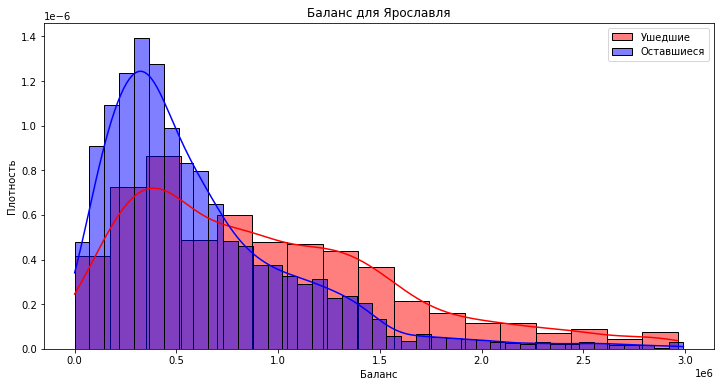

In [98]:
# Рассмотрим поближе распределение 'balance', отфильтруем заглушку и нулевые значения
df1 = dfb[(dfb['balance'] < 3000000)&(dfb['city_Ярославль']==1)]
plt.figure(figsize=(12,6)) 
plt.title('balance')
sns.histplot(data=df1[df1['churn']==1]['balance'], label='Ушедшие', kde=True, color='red', stat="density", common_norm=False)
sns.histplot(data=df1[df1['churn']==0]['balance'], label='Оставшиеся', kde=True, color='blue', stat="density", common_norm=False)
plt.ylabel('Плотность')
plt.xlabel('Баланс')
plt.title('Баланс для Ярославля')
plt.legend()
plt.show()

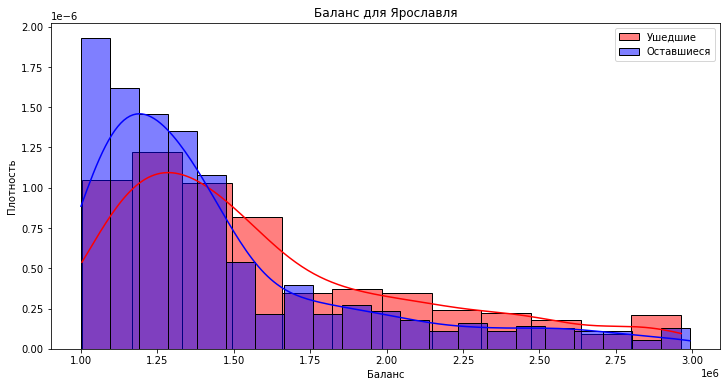

In [99]:
# Применим фильтр в балансу
df1 = df1[(df['balance'] > 1000000)&(dfb['city_Ярославль']==1)]
plt.figure(figsize=(12,6)) 
plt.title('balance')
sns.histplot(data=df1[df1['churn']==1]['balance'], label='Ушедшие', kde=True, color='red', stat="density", common_norm=False)
sns.histplot(data=df1[df1['churn']==0]['balance'], label='Оставшиеся', kde=True, color='blue', stat="density", common_norm=False)
plt.ylabel('Плотность')
plt.xlabel('Баланс')
plt.title('Баланс для Ярославля')
plt.legend()
plt.show()

В Ярославле среди категорийных данных можно выделить только клиентов с балансом более 1 500000 у.е., когда количество ушедших превышает процент оставшихся.

In [100]:
#для сегментного анализа необходимо чтобы отток был в два раза больше чем средницй по банку
print(f'Отношение ушедших к оставшимся: {ratio:.2f}%')
#от 300 до 2000 клиентов
#40% отточных от всего df


Отношение ушедших к оставшимся: 18.23%


Промежуточный вывод:

Процент ушедших клиентов по городам маленький и колеблется в диапазоне от 16% до 19%. Это говорит о том что нет проблем только в одном городе.

Выявить отточных клиентов в городах в разбивке по полу не удалось. По статистике в городах больше оттока среди мужского населения.

В разбивке по продуктам и городам виден большой отток с количеством продукта от 4 и выше.

В разбивке по наличию кредитной карты и городам высокоотточных сегментов не замечено

В разбивке по последней активности и городам высокоотточных сегментов не замечено.

В разбивке по колличеству баллов собственности и городам наблюдается высокий отток клиентов с баллом 9. Также наблюдается высокий отток клиентов с баллом 7 в Ярославле и 8 в Рыбинске.

Из анализа не категорийных значений видно, что во всех городах есть группа высокоотточных клиентов с баллом кредитного скоринга от 850 до 900. По остальным параметрам высокоотточных групп не замечено.

### Корреляционный анализ

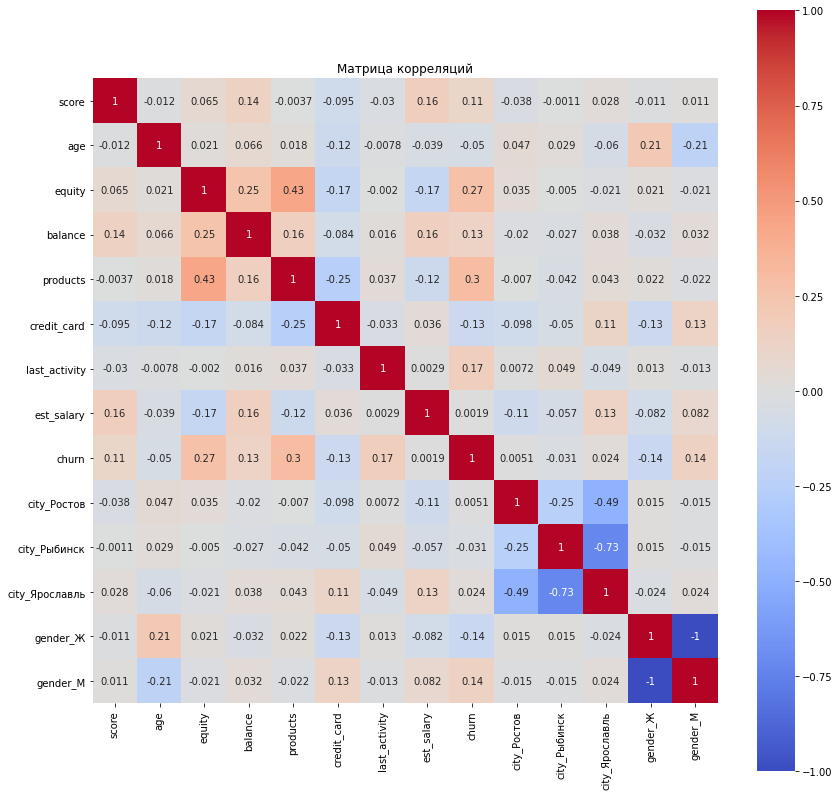

In [101]:
#построим и отрисуем матрицу корреляций
cm = df.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize = (14, 14))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True, square=True, cmap="coolwarm")
plt.title('Матрица корреляций')
plt.show()

<AxesSubplot:>

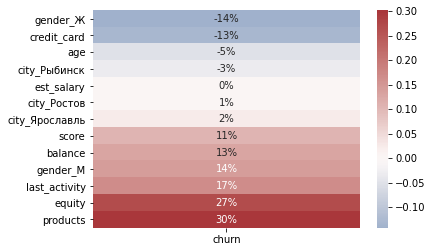

In [102]:
sns.heatmap(
cm.loc[:,['churn']].drop('churn').sort_values('churn'), annot=True,fmt=".0%", cmap="vlag", center=0)

Для описания корреляции удобно использовать шкалу Чеддока: 0 – полное отсутствие связи; 0 – 0.3 – очень слабая; 0.3 – 0.5 – слабая; 0.5 – 0.7 – средняя; 0.7 – 0.9 – высокая; 0.9 – 1 – очень высокая

В нашем случае превалирует очень слабая корреляция. Можно выделить слабоположительную корреляцию между колличеством продуктов и количеством баллов собственности, оттоком и количеством продуктов. Слабоотрицательная корреляция между Ростовом и Ярославлем. Высокая отрицательная - между Рыбинском и Ярославлем.

Если говорить про более интересный для нас параметр оттока, то полное отсутствие связи с оценочным доходом, слабую корреляцию с остальными параметрами (мужчинами и женщинами, наличием кредитной карты, возрастом,городами,баллами кредитного скоринга, балансом,активностью,количеством баллов собственности, количеством продуктов).

-------------------------------------------------------------------------------------------------------------------------------

Выводы по разделу:
    
    1. Доля оттока 18,24%
    
    2. если смотреть на распределение непрерывных величин, то вид распределений у параметра оценочного дохода как у оставшихся, так и у ушедших нормальный. Аналогично у ушедших клиентов в score. В остальных случаях (возраст и оставшиеся клиенты в баллах кредитного скоринга) имеются отклонения от номальности. Имеется высокая плотность ушедших в баллах кредитного скоринга в диапазоне от 850 до 900. По возрасту имеются отдельные всплески ушедших, но говорить про диапазон не приходится.
    
    3. Начиная с баланса в 1 млн у.е. отток превалирует.
    
Портрет отточного пользователя:

    1. Средний возраст отточных клиентов 41-42 года. Средний возраст неотточных клиентов 43-44 года

    2. Средний score отточных клиентов 863-864.

    3. Средний баланс отточный клиентов составляет 1134458 у.е.

    4. Средний оценочный доход отточных и не отточных сильно не отличается.

    5. По категорийным значениям есть отличия у отточных в:

колличестве баллов собственности 4 против не отточных, у которых 3,

активности 1 против не отточных, у которых 0,

поле у отточных преобладают мужчины, у не отточных женщины.
    
    6. с увеличением количества или стоимости собственноти процент оттока растет с 3% до 54%, что уже превышает в два раза средний отток по банку в 18,24%
    
    7. Процент оттока растет с ростом количества продуктов и достигает максимум в 63% с количеством продуктов банка 4. На 5 продуктах картина выравнивается и процент оттока уменьшается до 42%. Если сравнивать со средним оттоком по банку, то даже у клиентов с количеством продуктов 5 отток превышает в два раза средние показатели по банку.
    
    8. По наличию кредитных карт и последней активности вывокоотточных сегментов не выявлено (отток колеблется от 14% до 32%)
    
Выделение групп по нескольким признакам :
    
    Группа 1 - Женщины с количеством продукта 4 где отток составляет 56% (Процент оттока в два раза больше чем по банку, клиентов -179). Негодится для сегментного анализа!!!

    Группа 2 - Мужчины с количеством продукта 4 где отток составляет 68% (Процент оттока в два раза больше чем по банку, клиентов -295). Годится для сегментного анализа!!!

    Группа 3 - Мужчины с количеством продукта 5 где отток составляет 50% (Процент оттока в два раза больше чем по банку, клиентов -10). Негодится для сегментного анализа!!!
    
    Группа 4 - женщины с баллом собственности 9 , отток составил 50% (Процент оттока в два раза больше чем по банку, клиентов -6). Негодится для сегментного анализа!!!
        
    Группа 5 - мужчины с баллом собственности 5 и выше , отток составил более 50% (Процент оттока в два раза больше чем по банку, клиентов -1122). Годится для сегментного анализа!!!
    
    Группа 6 - По баллансу можно выделить высокоотточную группу среди мужчин с балансом выше 1500000 у.е. , отток составил 60% (Процент оттока в два раза больше чем по банку, клиентов -439). Годится для сегментного анализа!!!
    
    Группа 7 - По баллам кредитного скоринга можно выделить высокоотточную группу среди мужчин и женщин  с баллом от 850 до 900 , отток составил 22% и 12% (Процент оттока меньше либо сопоставим со средним по банку, клиентов - больше 1000 в каждой из групп). Не годится для сегментного анализа!!!
    
    В разрезе городов можно выделить следующие группы:
    
    Группа 8 - город Ярославль и количество продуктов больше 4 , отток составил 65% (Процент оттока в два раза больше чем по банку, клиентов -527). Годится для сегментного анализа!!!
    
    

## Проверка статистических гипотез 

### Первая гипотеза: различие дохода между теми клиентами, которые ушли и теми, которые остались

Нулевая гипотеза - доход между ушедшими и оставшимися клиентами не различается

Альтернативная - доход между ушедшими и оставшимися клиентами различается

In [103]:
#Подготовим данные
# Сохраним в переменных churn и no_churn соответствующие данные
churn= dfb[(dfb['churn']==1)]['est_salary']
no_churn= dfb[(dfb['churn']==0)]['est_salary']


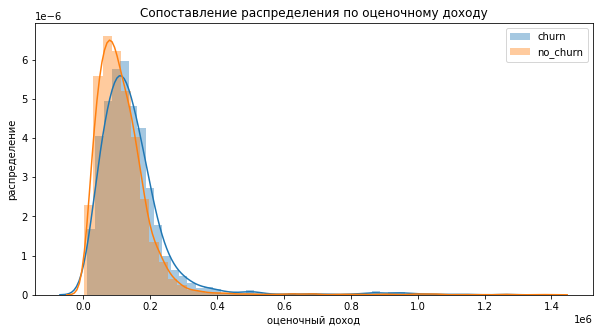

In [104]:
#построим распределение по каждой из выборок
fig = plt.figure(figsize=(10, 5))
plt.xlabel('xlabel')
plt.ylabel('распределение')
plt.title('Сопоставление распределения по оценочному доходу')
sns.distplot(churn, label='churn')
sns.distplot(no_churn, label='no_churn')
plt.xlabel('оценочный доход')
plt.legend()
plt.show()

Вид распеределения вцелом нормальный. Но есть ус справа. Проверим нормальность распределения с помощью критерия Шапиро-Уилка.

In [105]:
#для не отточных клиентов
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(no_churn)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [106]:
#для отточных клиентов
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(churn)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Критерий Шапиро-Уилка говорит нам о том , что распределение не нормально.

In [107]:
print('средний оценочный доход для отточных клиентов', churn.mean())
print('средний оценочный доход для не отточных клиентов', no_churn. mean())

средний оценочный доход для отточных клиентов 147087.27772978958
средний оценочный доход для не отточных клиентов 117624.662041787


In [108]:
# Размер выборок
churn_size = len(churn)
no_churn_size = len(no_churn)

print("Размер отточной выборки:", churn_size)
print("Размер не отточной выборки:", no_churn_size)

Размер отточной выборки: 1806
Размер не отточной выборки: 5887


In [109]:
# Произведем проверку дисперсии выборок
np.var(df[df['churn']==1]['est_salary'])

15103959585.933504

In [110]:
np.var(df[df['churn']==0]['est_salary'])

20356342952.421223

выборки не зависимы

In [111]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .05

results = st.ttest_ind(no_churn.dropna(), churn.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.300666576340109e-21
Отвергаем нулевую гипотезу


In [112]:
#Выполним проверку гипотезы. Будем использовать метод mannwhitneyu
alpha = 0.05

# Проведение теста Манна-Уитни
statistic, p_value = mannwhitneyu(no_churn.dropna(), churn.dropna())

print('p-значение:', p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.883333742571314e-39
Отвергаем нулевую гипотезу


T-критерий Стьюдента и U-критерий Манна-Уитни - это статистические тесты, которые используются для сравнения средних значений двух выборок. T-критерий имеет определенные предпосылки, а U-критерий является непараметрическим тестом, который не делает предположений о распределении данных.

T-критерий подходит для использования в случае, когда данные имеют нормальное распределение, и важно, чтобы обе выборки были одинакового размера. U-критерий Манна-Уитни, с другой стороны, может использоваться, когда данные не имеют нормальное распределение или когда выборки имеют разные размеры.

Расхождения между результатами работы критериев могут возникать из-за того, что T-критерий более чувствителен к выбросам и асимметрии данных, в то время как U-критерий менее чувствителен к таким аномалиям. Это может привести к различным результатам при использовании этих критериев для анализа данных.

В нашем случае мы имеем не нормальное распределение, большую разницу в размерах выборок, поэтому надежнее будет примененить U-критерий Манна-Уитни. Оба теста дали одинаковый результат - отвергаем нулевую гипотезу (доход между ушедшими и оставшимися клиентами не различается)

### Вторая гипотеза: различие баланса между теми клиентами, которые ушли и теми, которые остались, использующих 3 продукта и более

Нулевая гипотеза - Баланс между ушедшими и оставшимися клиентами, использующими 3 продукта и более не различается

Альтернативная - Баланс между ушедшими и оставшимися клиентами, использующими 3 продукта и более различается

In [113]:
#Подготовим данные
# Сохраним в переменных churn и no_churn соответствующие данные
churn= df[(df['churn']==1)&(df['products']>2)]['balance']
no_churn= df[(df['churn']==0)&(df['products']>2)]['balance']


print('средний баланс для отточных клиентов', churn.median())
print('средний баланс для не отточных клиентов', no_churn.median())

средний баланс для отточных клиентов 1137747.96
средний баланс для не отточных клиентов 565900.745


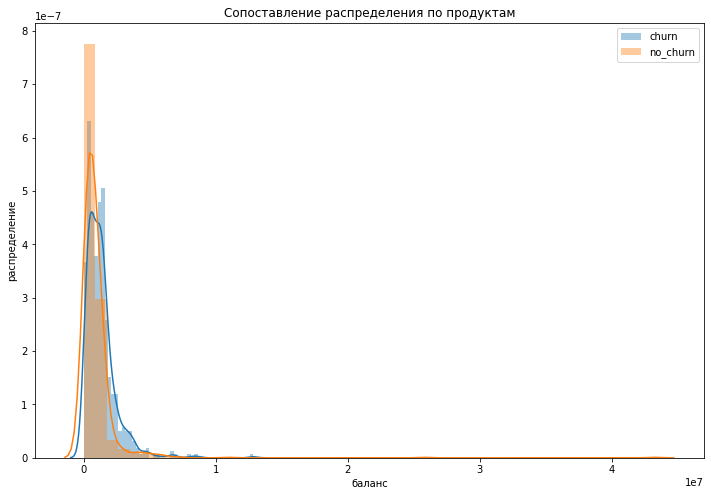

In [114]:
#построим распределение по каждой из выборок
fig = plt.figure(figsize=(12, 8))
plt.xlabel('xlabel')
plt.ylabel('распределение')
plt.title('Сопоставление распределения по продуктам')
sns.distplot(churn, label='churn')
sns.distplot(no_churn, label='no_churn')
plt.xlabel('баланс')
plt.legend()
plt.show()

Есть отклонение от нормальности. Проверим нормальность распределения с помощью критерия Шапиро-Уилка.

In [115]:
#для не отточных клиентов
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(no_churn)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [116]:
#для отточных клиентов
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(churn)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  3.273631020260354e-29
Отвергаем нулевую гипотезу: распределение не нормально


Критерий Шапиро-Уилка говорит нам о том , что распределение не нормально.

In [117]:
# Размер выборок
churn_size = len(churn)
no_churn_size = len(no_churn)

print("Размер отточной выборки:", churn_size)
print("Размер не отточной выборки:", no_churn_size)

Размер отточной выборки: 605
Размер не отточной выборки: 926


In [118]:
# Произведем проверку дисперсии выборок
np.var(df[df['churn']==1]['products'])

0.8499154645937641

In [119]:
np.var(df[df['churn']==0]['products'])

0.5088949728982569

In [120]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .05

results = st.ttest_ind(no_churn.dropna(), churn.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.9464497496697433e-07
Отвергаем нулевую гипотезу


In [121]:
#Выполним проверку гипотезы. Будем использовать метод mannwhitneyu
alpha = 0.05

# Проведение теста Манна-Уитни
statistic, p_value = mannwhitneyu(no_churn.dropna(), churn.dropna())

print('p-значение:', p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.088852201099826e-27
Отвергаем нулевую гипотезу


Т.к. распределение не нормально и есть разница в размере выборки, то критерий Манна-Уитни предпочтительней.

### Третья гипотеза: различие активности между теми клиентами, которые ушли и теми, которые остались

Нулевая гипотеза - нет различий в активности за последние 3 месяца между ушедшими и оставшимися клиентами

Альтернативная - активность  за последние 3 месяца между ушедшими и оставшимися клиентами различается

In [122]:
#Подготовим данные
# Сохраним в переменных churn и no_churn соответствующие данные
churn= df[(df['churn']==1)]['last_activity']
no_churn= df[(df['churn']==0)]['last_activity']


print('средняя активность для отточных клиентов', churn.median())
print('средняя активность для не отточных клиентов', no_churn.median())

средняя активность для отточных клиентов 1.0
средняя активность для не отточных клиентов 0.0


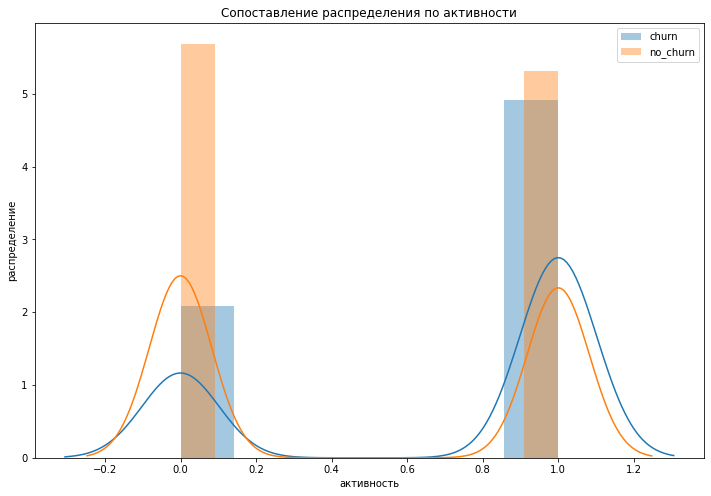

In [123]:
#построим распределение по каждой из выборок
fig = plt.figure(figsize=(12, 8))
plt.xlabel('xlabel')
plt.ylabel('распределение')
plt.title('Сопоставление распределения по активности')
sns.distplot(churn, label='churn')
sns.distplot(no_churn, label='no_churn')
plt.xlabel('активность')
plt.legend()
plt.show()

In [124]:
# Произведем проверку дисперсии выборок
np.var(df[df['churn']==1]['last_activity'])

0.20902604561886334

In [125]:
np.var(df[df['churn']==0]['last_activity'])

0.24970738237272097

In [126]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .05

results = st.ttest_ind(no_churn.dropna(), churn.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.7100589793857774e-70
Отвергаем нулевую гипотезу


In [127]:
#Выполним проверку гипотезы. Будем использовать z тест
alpha = 0.05

# Пропорции активных пользователей
p1 = no_churn.sum() / len(no_churn)
p2 = churn.sum() / len(churn)
n1 = len(no_churn)
n2 = len(churn)

# Расчет статистики z и p-значения
p = (p1 * n1 + p2 * n2) / (n1 + n2)
z = (p1 - p2) / ((p * (1 - p) * (1/n1 + 1/n2))**0.5)
p_value = st.norm.sf(abs(z)) * 2

print('p-значение:', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.057505553932748e-64
Отвергаем нулевую гипотезу


## Сегментация клиентов 

На основе сделанных выше выводов выделим несколько высокоотточных сегментов

### Сегмент 1

мужчины с баллом собственности 5 и выше 

In [128]:
#выделим сегмент
dfs=df.query ('gender_М==1 and equity>=5')
display(dfs)

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
4,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
8,923.0,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,0,0,1,0,1
14,815.0,Ярославль,М,35,5,547499.87,2,1,1,105883.26,0,0,0,1,0,1
16,829.0,Ярославль,М,45,5,507842.84,1,1,1,169330.64,0,0,0,1,0,1
18,876.0,Ярославль,М,40,5,2307947.36,2,0,0,287010.61,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,860.0,Рыбинск,М,30,5,605635.33,1,1,1,99368.24,0,0,1,0,0,1
9925,817.0,Ростов,М,44,5,826860.86,2,0,1,98024.46,0,1,0,0,0,1
9933,899.0,Ярославль,М,37,5,1422472.42,2,0,1,231978.68,1,0,0,1,0,1
9981,892.0,Рыбинск,М,39,5,636287.72,2,0,1,227288.27,1,0,1,0,0,1


In [129]:
# Рассчитаем общее число клиентов в этом сегменте:
print ('Общее число клиентов в сегменте №1:', dfs['age'].count() )


# Рассчитаем число отточных клиентов в этом сегменте:
print ('Число отточных клиентов в сегменте №1:', dfs[dfs['churn']==1]['age'].count())
print ('Число отточных клиентов мужского пола в сегменте №1:', dfs[(dfs['churn']==1)&(dfs['gender_М']==1)]['age'].count())


#  Рассчитаем долю отточных клиентов:
print ('Доля отточных клиентов в сегменте №1:', dfs[dfs['churn']==1]['age'].count() / dfs['age'].count()*100)
print ('Доля отточных клиентов в сегменте №1 в городе Ярославль:', dfs[(dfs['churn']==1)&(dfs['city_Ярославль']==1)]['age'].count() / dfs['age'].count()*100)
print ('Доля отточных клиентов в сегменте №1 в городе Ростове:', dfs[(dfs['churn']==1)&(dfs['city_Ростов']==1)]['age'].count() / dfs['age'].count()*100)
print ('Доля отточных клиентов в сегменте №1 в городе Рыбинске:', dfs[(dfs['churn']==1)&(dfs['city_Рыбинск']==1)]['age'].count() / dfs['age'].count()*100)






Общее число клиентов в сегменте №1: 1122
Число отточных клиентов в сегменте №1: 464
Число отточных клиентов мужского пола в сегменте №1: 464
Доля отточных клиентов в сегменте №1: 41.35472370766489
Доля отточных клиентов в сегменте №1 в городе Ярославль: 26.11408199643494
Доля отточных клиентов в сегменте №1 в городе Ростове: 5.525846702317291
Доля отточных клиентов в сегменте №1 в городе Рыбинске: 9.714795008912656


### Сегмент 2

мужчины с балансом выше 1500000 у.е.

In [130]:
#выделим сегмент
dfs=df.query ('gender_М==1 and balance>=1500000')
display(dfs)

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
18,876.0,Ярославль,М,40,5,2307947.36,2,0,0,287010.61,0,0,0,1,0,1
44,935.0,Ярославль,М,41,5,3781118.22,2,1,0,761349.20,0,0,0,1,0,1
77,937.0,Ярославль,М,33,5,2061152.96,2,1,1,280670.62,1,0,0,1,0,1
108,870.0,Ярославль,М,39,2,2166303.80,2,1,0,198711.08,0,0,0,1,0,1
125,1000.0,Ярославль,М,32,5,19757180.85,2,1,1,1024626.50,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,993.0,Рыбинск,М,38,6,4542980.70,1,1,1,491609.13,1,0,1,0,0,1
9911,961.0,Ярославль,М,38,5,2298650.66,4,1,0,247334.13,0,0,0,1,0,1
9926,852.0,Ярославль,М,39,4,2357977.58,2,0,0,213535.23,0,0,0,1,0,1
9941,862.0,Ростов,М,46,3,1784723.84,4,1,1,202524.28,1,1,0,0,0,1


In [131]:
# Рассчитаем общее число клиентов в этом сегменте:
print ('Общее число клиентов в сегменте №2:', dfs['age'].count() )


# Рассчитаем число отточных клиентов в этом сегменте:
print ('Число отточных клиентов в сегменте №2:', dfs[dfs['churn']==1]['age'].count())


#  Рассчитаем долю отточных клиентов:
print ('Доля отточных клиентов в сегменте №2:', dfs[dfs['churn']==1]['age'].count() / dfs['age'].count()*100)
print ('Доля отточных клиентов в сегменте №2 в городе Ярославль:', dfs[(dfs['churn']==1)&(dfs['city_Ярославль']==1)]['age'].count() / dfs['age'].count()*100)
print ('Доля отточных клиентов в сегменте №2 в городе Ростове:', dfs[(dfs['churn']==1)&(dfs['city_Ростов']==1)]['age'].count() / dfs['age'].count()*100)
print ('Доля отточных клиентов в сегменте №2в городе Рыбинске:', dfs[(dfs['churn']==1)&(dfs['city_Рыбинск']==1)]['age'].count() / dfs['age'].count()*100)




Общее число клиентов в сегменте №2: 439
Число отточных клиентов в сегменте №2: 263
Доля отточных клиентов в сегменте №2: 59.90888382687927
Доля отточных клиентов в сегменте №2 в городе Ярославль: 39.863325740318906
Доля отточных клиентов в сегменте №2 в городе Ростове: 6.150341685649203
Доля отточных клиентов в сегменте №2в городе Рыбинске: 13.895216400911162


### Сегмент 3

город Ярославль и количество продуктов больше 4

In [132]:
#выделим сегмент
dfs=df.query ('city_Ярославль==1 and products>=4')
display(dfs)


,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
76,922.0,Ярославль,Ж,37,5,1214707.38,4,0,1,85121.07,0,0,0,1,1,0
172,906.0,Ярославль,Ж,32,4,895645.72,4,0,1,101311.52,0,0,0,1,1,0
183,880.0,Ярославль,Ж,35,5,777716.01,4,0,1,136790.96,0,0,0,1,1,0
208,819.0,Ярославль,М,34,3,1228101.55,4,1,1,141504.44,1,0,0,1,0,1
232,881.0,Ярославль,М,42,3,1206192.01,4,0,0,106611.03,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,919.0,Ярославль,М,42,5,2183175.39,4,1,1,206343.23,1,0,0,1,0,1
9911,961.0,Ярославль,М,38,5,2298650.66,4,1,0,247334.13,0,0,0,1,0,1
9962,893.0,Ярославль,Ж,49,5,1571192.11,4,1,1,151217.99,1,0,0,1,1,0
9963,957.0,Ярославль,М,35,4,3431029.03,4,1,0,354987.43,1,0,0,1,0,1


In [133]:
# Рассчитаем общее число клиентов в этом сегменте:
print ('Общее число клиентов в сегменте №3:', dfs['age'].count() )


# Рассчитаем число отточных клиентов в этом сегменте:
print ('Число отточных клиентов в сегменте №3:', dfs[dfs['churn']==1]['age'].count())
print ('Число отточных клиентов мужского пола в сегменте №3:', dfs[(dfs['churn']==1)&(dfs['gender_М']==1)]['age'].count())
print ('Число отточных клиентов женского пола в сегменте №3:', dfs[(dfs['churn']==1)&(dfs['gender_Ж']==1)]['age'].count())

#  Рассчитаем долю отточных клиентов:
print ('Доля отточных клиентов в сегменте №3:', dfs[dfs['churn']==1]['age'].count() / dfs['age'].count()*100)
print ('Доля отточных клиентов в сегменте №3 в городе Ярославль:', dfs[(dfs['churn']==1)&(dfs['city_Ярославль']==1)]['age'].count() / dfs['age'].count()*100)


Общее число клиентов в сегменте №3: 321
Число отточных клиентов в сегменте №3: 206
Число отточных клиентов мужского пола в сегменте №3: 131
Число отточных клиентов женского пола в сегменте №3: 75
Доля отточных клиентов в сегменте №3: 64.17445482866043
Доля отточных клиентов в сегменте №3 в городе Ярославль: 64.17445482866043


### Сегмент 4

Мужчины с количеством продукта 4

In [134]:
#выделим сегмент
dfs=df.query ('gender_М==1 and products>=4')
display(dfs)


,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
81,850.0,Рыбинск,М,34,5,351583.16,4,0,1,115354.97,1,0,1,0,0,1
103,841.0,Ростов,М,29,1,175505.11,4,1,1,48188.69,0,1,0,0,0,1
160,908.0,Рыбинск,М,30,3,245237.57,4,1,1,78324.89,1,0,1,0,0,1
203,885.0,Рыбинск,М,62,7,617358.97,4,0,1,42887.04,0,0,1,0,0,1
208,819.0,Ярославль,М,34,3,1228101.55,4,1,1,141504.44,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,919.0,Ярославль,М,42,5,2183175.39,4,1,1,206343.23,1,0,0,1,0,1
9911,961.0,Ярославль,М,38,5,2298650.66,4,1,0,247334.13,0,0,0,1,0,1
9941,862.0,Ростов,М,46,3,1784723.84,4,1,1,202524.28,1,1,0,0,0,1
9963,957.0,Ярославль,М,35,4,3431029.03,4,1,0,354987.43,1,0,0,1,0,1


In [135]:
# Рассчитаем общее число клиентов в этом сегменте:
print ('Общее число клиентов в сегменте №4:', dfs['age'].count() )


# Рассчитаем число отточных клиентов в этом сегменте:
print ('Число отточных клиентов в сегменте №4:', dfs[dfs['churn']==1]['age'].count())


#  Рассчитаем долю отточных клиентов:
print ('Доля отточных клиентов в сегменте №4:', dfs[dfs['churn']==1]['age'].count() / dfs['age'].count()*100)
print ('Доля отточных клиентов в сегменте №4 в городе Ярославль:', dfs[(dfs['churn']==1)&(dfs['city_Ярославль']==1)]['age'].count() / dfs['age'].count()*100)
print ('Доля отточных клиентов в сегменте №4 в городе Ростове:', dfs[(dfs['churn']==1)&(dfs['city_Ростов']==1)]['age'].count() / dfs['age'].count()*100)
print ('Доля отточных клиентов в сегменте №4 в городе Рыбинске:', dfs[(dfs['churn']==1)&(dfs['city_Рыбинск']==1)]['age'].count() / dfs['age'].count()*100)




Общее число клиентов в сегменте №4: 305
Число отточных клиентов в сегменте №4: 205
Доля отточных клиентов в сегменте №4: 67.21311475409836
Доля отточных клиентов в сегменте №4 в городе Ярославль: 42.950819672131146
Доля отточных клиентов в сегменте №4 в городе Ростове: 8.852459016393443
Доля отточных клиентов в сегменте №4 в городе Рыбинске: 15.40983606557377


Выводы по разделу:

    По оттоку клиентов первое мето занимает сегмент 4 (Мужчины с количеством продукта 4) - 67%, количество клиентов - 305. Второе место занимает сегмент 3 (город Ярославль и количество продуктов больше 4) - 64%, количество клиентов - 321. Почетное третье место занимает сегмент 2 (мужчины с балансом выше 1500000 у.е.) - 60%, количество клиентов - 439.
    Первый сегмент самый многочисленный и самый малоотточный. Что мешает понять истинную причину оттока клиентов. Наиболее показательные сегменты 2, 3 и 4. 
    

# Выводы по исследованию

Данных для проведения исследования по оттоку клиентов банка достаточно. Сами данные имеют не большие проблемы. Пропусков, нулевых значений не много. В графе "возраст" их менее 1%, их можно просто удалить, а вот в графе "баланс" их доля стремится к 30%, что достаточно много удалять или заменять "искусственными" значениями не корректно, поставил заглушку.

Если говорить о природе пропусков, то она не ясна, это могут быть и нулевые значения, ошибки при заполнении таблицы, ошибки при выгрузки таблицы. Аможет кто-то решил скрыть свои доходы.

Аномальных значений не много. Они имеются только в графах equity и balance. Удалять их нельзя, поэтому в процессе исследований с использованием этих граф стоят фильтры.

Явных дубликатов не выявлено. Если смотреть на дубликаты в отдельных столбцах в привязке к остальным данным, то видно что это разные клиенты, проживающие в разных городах, разного возраста, имееют разные баллы, баланс и доход, ну и разный признак оттока Удалять таких клиентов нельзя. В общем и целом природа дубликатов связанна с процессами в работе банка. Нужно делать упор на точность заполнения данных.

Исследовательский анализ данных показал, что отток клиентов составил 18,24%. Значения не большие но весомые для банка, т.к. проще и дешевле поддерживать действующих клиентов чем искать новых.
Начиная с баланса в 1 млн у.е. отток превалирует - это одна из точек роста.

Портрет отточного пользователя:

1. Средний возраст отточных клиентов 41-42 года. Средний возраст неотточных клиентов 43-44 года

2. Средний балл кредитного скоринга отточных клиентов 863-864.

3. Средний баланс отточный клиентов составляет 1134458 у.е.

4. Средний оценочный доход отточных и не отточных сильно не отличается.

5. По категорийным значениям есть отличия у отточных в:

колличестве баллов собственности 4 против не отточных, у которых 3,

активности 1 против не отточных, у которых 0,

поле у отточных преобладают мужчины, у не отточных женщины.

6. С увеличением количества или стоимости собственноти процент оттока растет с 3% до 54%, что уже превышает в два раза      средний отток по банку в 18,24%.

7. С количеством продуктов банка еще интереснее. Процент оттока растет с ростом количества продуктов и достигает максимум в 63% с количеством продуктов банка 4. На 5 продуктах картина выравнивается и процент оттока уменьшается до 42%.Если            сравнивать со средним оттоком по банку, то даже у клиентов с количеством продуктов 5 отток превышает в два раза средние        показатели по банку.

В нашем случае превалирует очень слабая корреляция. Можно выделить слабоположительную корреляцию между колличеством продуктов и количеством баллов собственности, оттоком и количеством продуктов. Слабоотрицательная корреляция между Ростовом и Ярославлем. Высокая отрицательная - между Рыбинском и Ярославлем.

Если говорить про более интересный для нас параметр оттока, то полное отсутствие связи с оценочным доходом, слабую корреляцию с остальными параметрами (мужчинами и женщинами, наличием кредитной карты, возрастом,городами,баллами кредитного скоринга, балансом,активностью,количеством баллов собственности, количеством продуктов).

В процессе исследования было выявлено 4 высокоотточных сегмента.

Сегмент 1 - мужчины с баллом собственности 5 и выше. 
Общее число клиентов в сегменте №1: 1122
Число отточных клиентов в сегменте №1: 464
Доля отточных клиентов в сегменте №1: 41.35%

    Точка роста - предложение для пользователей с большим баллом собственности каких-либо программ по страховке или преференций по кредитованию.

Сегмент 2 - мужчины с балансом выше 1500000 у.е.
Общее число клиентов в сегменте №2: 439
Число отточных клиентов в сегменте №2: 263
Доля отточных клиентов в сегменте №2: 59.91%

    Точка роста - предложение для пользователей с высоким балансом каких-либо программ по инвестированию, сбережению или преференций по кредитованию.

Сегмент 3 - город Ярославль и количество продуктов больше 4.
Общее число клиентов в сегменте №3: 321
Число отточных клиентов в сегменте №3: 206
Доля отточных клиентов в сегменте №3: 64.17%

    Точка роста - обратить внимание на представительства банка в Ярославле, возможно там есть проблемы в продуктовом направлении

Сегмент 4 - Мужчины с количеством продукта 4
Общее число клиентов в сегменте №4: 305
Число отточных клиентов в сегменте №4: 205
Доля отточных клиентов в сегменте №4: 67.21311475409836

    Точка роста - есть проблемы с развитием клиентских программ, нужно дальнейшее их развитие, предложение новых продуктов, информирование о выходе нового продукта.

Первый сегмент самый многочисленный и самый малоотточный. Что мешает понять истинную причину оттока клиентов. Наиболее показательные сегменты 2, 3 и 4. 